In [1]:
# Part to import all the modules required throughout the notebook
from rdkit import Chem, DataStructs
from rdkit.Chem import rdChemReactions, AllChem, rdMolAlign, Draw, SDMolSupplier, Descriptors, rdDistGeom
from rdkit.Chem.Draw import IPythonConsole, MolDrawing, DrawingOptions
from rdkit.Chem.Fingerprints import FingerprintMols
import openbabel as ob
import os, glob, sys, heapq, random, subprocess
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sb
from scipy import stats
IPythonConsole.ipython_useSVG=True

In [2]:
# Define your working directory
w_dir = 'C:\Google Drive\Rob Paton CSU\Project Pd Lily\Reaction_Prediction'

In [3]:
# This part will read the current energies and try to fit a linear model

os.chdir(w_dir+'\TS_energy')
    
# define the initial aryl chlorides and amines here
arenes_names = ['ar01', 'ar02', 'ar03', 'ar04', 'ar05', 'ar06', 'ar07', 'ar08', 'ar09', 'ar10', 'ar11', 'ar12', 'ar13', 'ar14', 'ar15', 'ar16', 'ar17','ar18', 'ar19', 'ar20', 'ar21', 'ar22', 'ar23', 'ar24', 'ar25', 'ar26', 'ar27', 'ar28', 'ar29', 'ar30', 'ar31', 'ar32', 'ar33', 'ar34', 'ar35', 'ar36', 'ar37', 'ar38', 'ar39', 'ar40', 'ar41', 'ar42', 'ar43', 'ar44', 'ar45', 'ar46', 'ar47', 'ar48']
arenes_smiles = ['ClC3=CC=NC=C3', 'ClC1=CC=[N+]([B-](C)(C)C)C=C1', 'ClC1=CC=[N+]([B-](C2=CC=CC=C2)(C3=CC=CC=C3)C4=CC=CC=C4)C=C1', 'ClC1=CC=[N+]([B-](Cl)(Cl)Cl)C=C1','ClC1=CC=[N+]([B-](Br)(Br)Br)C=C1','ClC1=CC=[N+]([Zn-](Cl)Cl)C=C1', 'ClC%13=CC=[N+](C=C%13)C','ClC%12=CC=[N+](C=C%12)[H]', 'ClC4=CN=CC=C4', 'C[B-](C)([N+]1=CC=CC(Cl)=C1)C','Cl[Zn-](Cl)[N+]1=CC=CC(Cl)=C1','ClC5=NC=CC=C5', 'C[B-](C)([N+]1=C(C=CC=C1)Cl)C','Cl[Zn-](Cl)[N+]1=C(Cl)C=CC=C1', 'ClC6=CN=CN=C6','ClC7=NC=NC=C7','ClC%11=NC=NC=N%11','ClC%10=CC(C)=NC=C%10','ClC9=C(C)C=NC=C9','ClC8=CC=C(C)C=C8','ClC1=CC=C(N)C=C1','ClC%19=CC=CC=C%19', 'ClC1=CC=C(C=C1)C(F)(F)F','ClC%17=CC%18=C(C=C%17)NC=C%18', 'ClC%16=CSC=N%16','CC%14=NC%15=C(C=CC(Cl)=C%15)S%14','CC1=CC(C)=CC(Cl)=C1','ClC1=CC(C(C)(C)C)=CC(C(C)(C)C)=C1','CC1=CC(Cl)=CC=C1','CC1=C(Cl)C=CN=C1','CC1=C(Cl)C(C)=CN=C1','ClC1=C(C(C)(C)C)C=NC=C1','ClC1=C(C(F)(F)F)C=NC=C1','ClC1=C(C(F)(F)F)C=NC=C1C(F)(F)F','ClC1=C(C)N=CN=C1','ClC1=C(C)N=CN=C1C','ClC1=C(C(F)(F)F)N=CN=C1','ClC1=C(C(C)(C)C)C=NC=C1C(C)(C)C','ClC1=NC=NC=C1C','ClC1=C([N+]([O-])=O)N=CN=C1','ClC1=CN=C([N+]([O-])=O)N=C1','ClC1=NC=NC=C1[N+]([O-])=O','ClC1=C([N+]([O-])=O)C=NC=C1[N+]([O-])=O','ClC1=C([N+]([O-])=O)C=C([N+]([O-])=O)C=C1[N+]([O-])=O','ClC1=CC=[N+](S(=O)(C(F)(F)F)=O)C=C1','ClC1=CC=[N+](S(=O)(C)=O)C=C1','ClC1=CC=[N+](C(C)=O)C=C1','ClC1=CC=[N+](F)C=C1']
amines_names = ['am01', 'am02', 'am03', 'am04', 'am05', 'am06', 'am07', 'am08', 'am09', 'am10', 'am11', 'am12', 'am13', 'am14', 'am15', 'am16', 'am17', 'am18', 'am19', 'am20', 'am21', 'am22', 'am23', 'am24', 'am25', 'am26']
amines_smiles = ['[H]N(C1=CC=C(C)C=C1)C2=CC=C(C)C=C2', '[H]N(C1=CC=C(C(F)(F)F)C=C1)C2=CC=C(C(F)(F)F)C=C2', '[H]N(C1=CC=C(N)C=C1)C2=CC=C(N)C=C2','[H]N([H])C1=CC=CC=C1','[H]N(C1=CC=CC=C1)C','[H]N([H])C1=CC=NC=C1','[H]N(C1=CC=NC=C1)C','CN([H])[H]','CN(C)[H]','[H]N1CCCCC1','O=C(C)N([H])[H]','O=C(N([H])[H])C1=CC=C(C(F)(F)F)C=C1', '[H]N1CCCC1=O','[H]N1C=CC2=CC=CC=C21','[H]N1N=CC=C1','[H]N1C=NC2=CC=CC=C21','[H]/N=C(C1=CC=CC=C1)\C2=CC=CC=C2','[H]N/N=C(C1=CC=CC=C1)\C2=CC=CC=C2','[H]N1CCCCC1C','[H]N(C(C)C)C(C)C','[H]N(C(C)(C)C)C(C)(C)C','[H]N(C1=C(C)C=CC=C1C)C2=C(C)C=CC=C2C','[H]N(C1=C(C(C)(C)C)C=CC=C1C(C)(C)C)C2=C(C(C)(C)C)C=CC=C2C(C)(C)C','CN([SiH3])[H]','[SiH3]N([SiH3])[H]','[H]N([Si](C)(C)C)[Si](C)(C)C']
phosphines_names = ['pp01', 'pp02', 'pp03', 'pp04', 'pp05', 'pp06', 'pp07']
phosphines_smiles = ['P(C1=CC=CC=C1P(C2=CC=CC=C2)C3=CC=CC=C3)(C4=CC=CC=C4)C5=CC=CC=C5','CP(C)CCP(C)C','FC1=C(F)C(F)=C(F)C(F)=C1P(C2=C(F)C(F)=C(F)C(F)=C2F)CCP(C3=C(F)C(F)=C(F)C(F)=C3F)C4=C(F)C(F)=C(F)C(F)=C4F','P(/C=C\P(C5=CC=CC=C5)C6=CC=CC=C6)(C7=CC=CC=C7)C8=CC=CC=C8','P(CCP(C9=CC=CC=C9)C%10=CC=CC=C%10)(C%11=CC=CC=C%11)C%12=CC=CC=C%12','P(CP(C%13=CC=CC=C%13)C%14=CC=CC=C%14)(C%15=CC=CC=C%15)C%16=CC=CC=C%16','P(C%17=CC=CC=C%17)(C%18=CC=CC=C%18)CCCP(C%19=CC=CC=C%19)C%20=CC=CC=C%20']


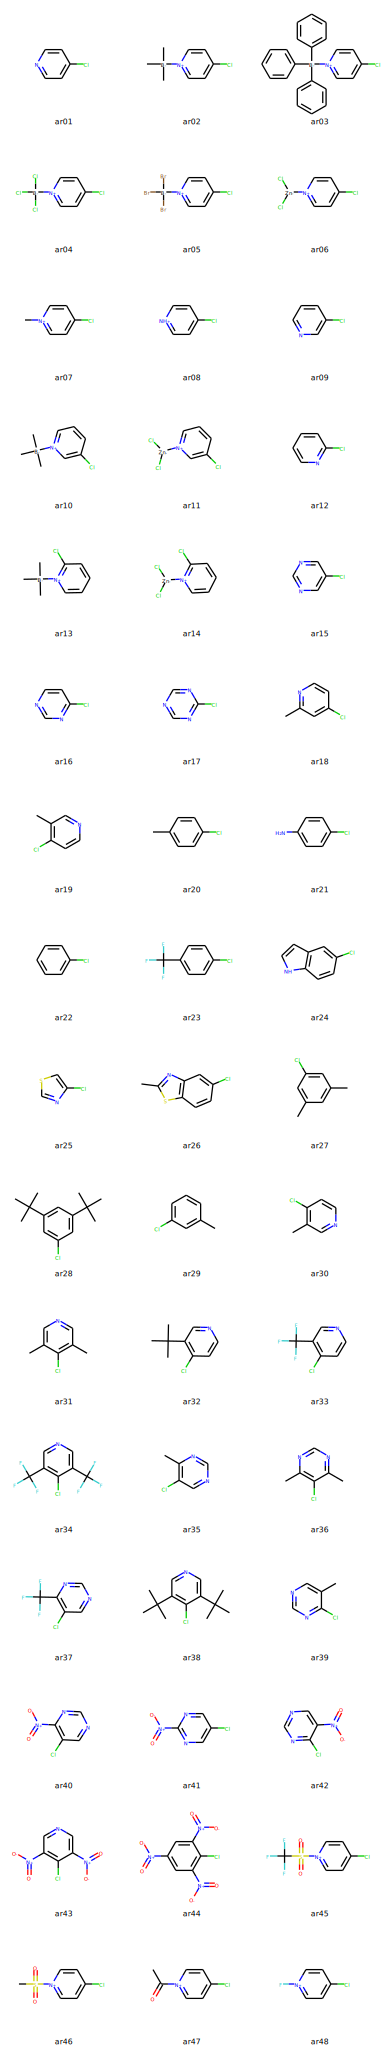

In [19]:
# Since the above part is the only manual part, please check that all the arenes, amines (below)
# and phosphines (below) are right

arenes = [Chem.MolFromSmiles(smi) for smi in arenes_smiles]
Draw.MolsToGridImage(arenes, molsPerRow=3, legends=arenes_names)


In [ ]:
amines = [Chem.MolFromSmiles(smi) for smi in amines_smiles]
Draw.MolsToGridImage(amines, molsPerRow=3, legends=amines_names)

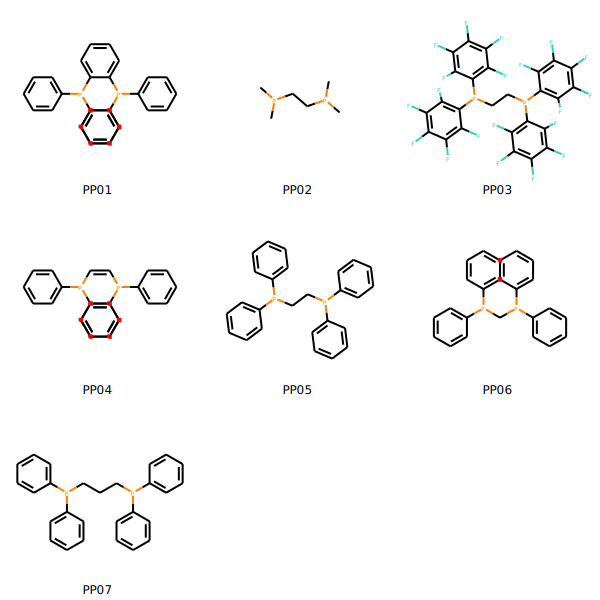

In [112]:
phosphines = [Chem.MolFromSmiles(smi) for smi in phosphines_smiles]
Draw.MolsToGridImage(phosphines, molsPerRow=3, legends=phosphines_names)

In [102]:
# Generate a wide variety of different arenes and amines

# Name of the file containing all the SMILES to generate
# Very important! The line of 'Substituents' MUST be at the end of the txt file
file = "Input_Ground_state_generator.txt"

# If you want to create a new database of amines, arenes and phosphines, just put True (just recommended for the first time)
# If you want to load results from a previous database, put False
generate_database = True

# Generate the database of arenes, amines and phosphines
if generate_database == True:

    os.chdir(w_dir)

    f = open(file,"r")
    read_lines_smiles = f.readlines()
    arenes_generated_names = []
    arenes_generated_smiles = []
    amines_generated_names = []
    amines_generated_smiles = []
    phosphines_generated_names = []
    phosphines_generated_smiles = []
    ar_starting_number = len(arenes_names)+1 
    am_starting_number = len(amines_names)+1 
    pp_starting_number = len(phosphines_names)+1 

    # Getting SMILES for the aromatics in the ChemDraw
    for line in read_lines_smiles:
        count = 0
        if line.find("Electrophiles.") > -1:
            for i in range(len(line.split('.'))):
                if line.split('.')[i] != 'Electrophiles':
                    if line.split('.')[i].find('[Cs]') == -1:
                        name = 'ar'+str(ar_starting_number+count)
                        count = count + 1
                        arenes_generated_names.append(name)
                        arenes_generated_smiles.append(line.split('.')[i])               
                    elif line.split('.')[i].find('[Cs]') > -1:
                        start_mol = Chem.MolFromSmiles(line.split('.')[i])
                        for line2 in read_lines_smiles:                        
                            if line2.find("Substituents.") > -1:
                                for j in range(len(line2.split('.'))):
                                    if line2.split('.')[j] != "Substituents":  
                                      if line2.split('.')[j][0:3] == '[H]':
                                        mod_mol = Chem.ReplaceSubstructs(start_mol, 
                                              Chem.MolFromSmiles('C[Cs]'), 
                                              Chem.MolFromSmiles('C'+line2.split('.')[j][3:]),
                                              replaceAll=True)
                                        new_smiles = Chem.MolToSmiles(mod_mol[0])
                                      elif line2.split('.')[j][-3:] == '[H]':
                                        mod_mol = Chem.ReplaceSubstructs(start_mol, 
                                              Chem.MolFromSmiles('C[Cs]'), 
                                              Chem.MolFromSmiles('C'+line2.split('.')[j][:-3]),
                                              replaceAll=True) 
                                        new_smiles = Chem.MolToSmiles(mod_mol[0])
                                      else:
                                        mod_mol = Chem.ReplaceSubstructs(start_mol, 
                                              Chem.MolFromSmiles('C[Cs]'), 
                                              Chem.MolFromSmiles('C'+line2.split('.')[j]),
                                              replaceAll=True)
                                        new_smiles = Chem.MolToSmiles(mod_mol[0])
                                      name = 'ar'+str(ar_starting_number+count)
                                      count = count + 1
                                      arenes_generated_names.append(name)
                                      arenes_generated_smiles.append(new_smiles) 

    # Getting SMILES for the amines in the ChemDraw
    for line in read_lines_smiles:
        count = 0
        if line.find("Nucleophiles.") > -1:
            for i in range(len(line.split('.'))):
                if line.split('.')[i] != 'Nucleophiles':
                    if line.split('.')[i].find('[Cs]') == -1:
                        name = 'am'+str(am_starting_number+count)
                        count = count + 1
                        amines_generated_names.append(name)
                        amines_generated_smiles.append(line.split('.')[i]) 
                    elif line.split('.')[i].find('[Cs]') > -1:
                        start_mol = Chem.MolFromSmiles(line.split('.')[i])
                        for line2 in read_lines_smiles:                        
                            if line2.find("Substituents.") > -1: 
                                for j in range(len(line2.split('.'))):
                                    if line2.split('.')[j] != "Substituents":  
                                      if line2.split('.')[j][0:3] == '[H]':
                                        mod_mol = Chem.ReplaceSubstructs(start_mol, 
                                              Chem.MolFromSmiles('C[Cs]'), 
                                              Chem.MolFromSmiles('C'+line2.split('.')[j][3:]),
                                              replaceAll=True)
                                        new_smiles = Chem.MolToSmiles(mod_mol[0])
                                      elif line2.split('.')[j][-3:] == '[H]':
                                        mod_mol = Chem.ReplaceSubstructs(start_mol, 
                                              Chem.MolFromSmiles('C[Cs]'), 
                                              Chem.MolFromSmiles('C'+line2.split('.')[j][:-3]),
                                              replaceAll=True) 
                                        new_smiles = Chem.MolToSmiles(mod_mol[0])

                                      else:
                                        mod_mol = Chem.ReplaceSubstructs(start_mol, 
                                              Chem.MolFromSmiles('C[Cs]'), 
                                              Chem.MolFromSmiles('C'+line2.split('.')[j]),
                                              replaceAll=True)
                                        new_smiles = Chem.MolToSmiles(mod_mol[0])
                                      name = 'am'+str(am_starting_number+count)
                                      count = count + 1
                                      amines_generated_names.append(name)
                                      amines_generated_smiles.append(new_smiles)
    
    # Getting SMILES for the phosphines in the ChemDraw
    for line in read_lines_smiles:
        count = 0
        if line.find("Phosphines.") > -1:
            for i in range(len(line.split('.'))):
                if line.split('.')[i] != 'Phosphines':
                    if line.split('.')[i].find('[Cs]') == -1:
                        name = 'pp'+str(pp_starting_number+count)
                        count = count + 1
                        phosphines_generated_names.append(name)
                        phosphines_generated_smiles.append(line.split('.')[i]) 
                    elif line.split('.')[i].find('[Cs]') > -1:
                        for line2 in read_lines_smiles:                        
                            if line2.find("Phos_subs.") > -1:
                                for j in range(len(line2.split('.'))):
                                    # I had to change the strategy. 2 Cs atoms cannot be
                                    # added to the same atom. Then, I had to use 1 Cs and 
                                    # 1 K atom.
                                    if line2.split('.')[j] != "Phos_subs":
                                        # I include this line to correct for the PMe substituent
                                        if line2.split('.')[j] == 'CP':
                                            line2.split('.')[j] = 'PC'
                                        start_mol = Chem.MolFromSmiles(line.split('.')[i])
                                        mod_mol = Chem.ReplaceSubstructs(start_mol, 
                                              Chem.MolFromSmiles('P[Cs]'), 
                                              Chem.MolFromSmiles(line2.split('.')[j]),
                                              replaceAll=True)
                                        new_smiles = Chem.MolToSmiles(mod_mol[0])
                                        start_mol2 = Chem.MolFromSmiles(new_smiles)
                                        mod_mol2 = Chem.ReplaceSubstructs(start_mol2, 
                                              Chem.MolFromSmiles('P[K]'), 
                                              Chem.MolFromSmiles(line2.split('.')[j]),
                                              replaceAll=True)
                                        new_smiles2 = Chem.MolToSmiles(mod_mol2[0])
                                        name = 'pp'+str(pp_starting_number+count)
                                        count = count + 1
                                        phosphines_generated_names.append(name)
                                        phosphines_generated_smiles.append(new_smiles2)
                                        
    print(len(arenes_generated_smiles), 'new arenes,', len(amines_generated_smiles), 'new amines and', len(phosphines_generated_smiles), 'new phosphines were generated.')
    
    # This part collects all the data (original + generated) to use in the big Excel database
    Database_arenes, Database_amines, Database_phosphines = [[],[],[]],[[],[],[]],[[],[],[]]

    # This part includes the initial 48 arenes, 26 amines and 7 phosphines used
    for i in range(len(arenes_names)):
            Database_arenes[0].append(arenes_names[i])
            Database_arenes[1].append(arenes_smiles[i])
            
    for i in range(len(amines_names)):
            Database_amines[0].append(amines_names[i])
            Database_amines[1].append(amines_smiles[i])
            
    for i in range(len(phosphines_names)):
            Database_phosphines[0].append(phosphines_names[i])
            Database_phosphines[1].append(phosphines_smiles[i])
            
    # This part includes the new generated components      
    for i in range(len(arenes_generated_names)):
            Database_arenes[0].append(arenes_generated_names[i])
            Database_arenes[1].append(arenes_generated_smiles[i])
            
    for i in range(len(amines_generated_names)):
            Database_amines[0].append(amines_generated_names[i])
            Database_amines[1].append(amines_generated_smiles[i])
            
    for i in range(len(phosphines_generated_names)):
            Database_phosphines[0].append(phosphines_generated_names[i])
            Database_phosphines[1].append(phosphines_generated_smiles[i])
           
    # This part includes the new generated arenes and amines
    # First, a filter excludes all the repeated structures that were automatically generated. I have to use
    # fingerprints with 'unoptimized' parameters as the criteria for filtering since multiple SMILES can
    # lead to the same compound
    
    # First for arenes
    filter_arenes_fp, filter_arenes_fp, filter_phosphines_fp = [],[],[]
    for smi in Database_arenes[1]:
        try:
            fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi), radius=2, nBits = 60)
            arr = np.zeros((0,), dtype=np.int8)
            fp_np = DataStructs.ConvertToNumpyArray(fp, arr)
            Database_arenes[2].append(arr)
        except:
            print('Arene', Database_arenes[1][i],'could not be converted into a fingerprint vector, removing from the database...')  

    # Now amines
    # There is a problem with some of the amines when generating Morgan fingerprints. This part deletes 
    # the names and SMILES from amines that cannot be converted into fingerprints
    list_index_remove = []
    for i in range(len(Database_amines[1])):
        try:
            new_fp_am = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(Database_amines[1][i]), radius=2, nBits = 60)
            new_arr_am = np.zeros((0,), dtype=np.int8)
            new_fp_np_am = DataStructs.ConvertToNumpyArray(new_fp_am, new_arr_am)
            Database_amines[2].append(new_arr_am)
        except: 
            list_index_remove.append(i)
            print('Amine', Database_amines[1][i],'could not be converted into a fingerprint vector, removing from the database...')  

    for i in reversed(list_index_remove):
        Database_amines[0].remove(Database_amines[0][i])
        Database_amines[1].remove(Database_amines[1][i])

    # Now phosphines        
    for smi in Database_phosphines[1]:
        try:
            fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi), radius=2, nBits = 60)
            arr = np.zeros((0,), dtype=np.int8)
            fp_np = DataStructs.ConvertToNumpyArray(fp, arr)
            Database_phosphines[2].append(arr)
        except:
            print('Posphine', Database_phosphines[1][i],'could not be converted into a fingerprint vector, removing from the database...')  
    
    not_to_include_ar = []
    for i in range(len(Database_arenes[2])):
        for j in range(len(Database_arenes[2])):
            if i != j:
                if Database_arenes[2][i].tolist() == Database_arenes[2][j].tolist():
                    if i not in not_to_include_ar:
                        not_to_include_ar.append(j) 

    not_to_include_am = []
    for i in range(len(Database_amines[2])):
        for j in range(len(Database_amines[2])):
            if i != j:
                if Database_amines[2][i].tolist() == Database_amines[2][j].tolist():
                    if i not in not_to_include_am:
                        not_to_include_am.append(j) 

    not_to_include_pp = []
    for i in range(len(Database_phosphines[2])):
        for j in range(len(Database_phosphines[2])):
            if i != j:
                if Database_phosphines[2][i].tolist() == Database_phosphines[2][j].tolist():
                    if i not in not_to_include_pp:
                        not_to_include_pp.append(j) 
                        
    for i in reversed(not_to_include_ar):
        Database_arenes[0].pop(i)
        Database_arenes[1].pop(i)
        
    for i in reversed(not_to_include_am):
        Database_amines[0].pop(i)
        Database_amines[1].pop(i) 

    for i in reversed(not_to_include_pp):
        Database_phosphines[0].pop(i)
        Database_phosphines[1].pop(i) 
        
    # This empties the list of fingerprints since later it will be filled with fingerprints generated
    # using the optimized values for the random forest model
    Database_arenes[2], Database_amines[2], Database_phosphines[2] = [],[],[]
      
    # Create Excel with initial + generated names and SMILES
    os.chdir(w_dir+'\TS_energy')

    # First, I put all the names and SMILES into a dictionary
    components_database = dict ([('Arenes_names', Database_arenes[0]),
        ('Arenes_smiles', Database_arenes[1]),
        ('Amines_names', Database_amines[0]),
        ('Amines_smiles', Database_amines[1]),
        ('Phosphines_names', Database_phosphines[0]),
        ('Phosphines_smiles', Database_phosphines[1]), 
                                ])
    # Then, everything is put into a pandas dataframe and into a csv file
    df_components = DataFrame.from_dict(components_database, orient='index')
    df_components = df_components.transpose()
    
    export_excel = df_components.to_csv('Individual_components.csv', index = None, header=True)

    print('\nAfter filtering off duplicates, there are',df_components['Arenes_smiles'].count(),'arenes,', df_components['Amines_smiles'].count(),'amines and', df_components['Phosphines_smiles'].count(),'phosphines in the database.')

# Load a previously generated database from a csv file    
elif generate_database == False:
    os.chdir(w_dir+'\TS_energy')
    
    df_components = pd.read_csv('Individual_components.csv')

    print('The database of individual components was successfully loaded with', df_components['Arenes_smiles'].count(),'arenes,', df_components['Amines_smiles'].count(),'amines and', df_components['Phosphines_smiles'].count(),'phosphines.')


418 new arenes, 358 new amines and 30 new phosphines were generated.

After filtering off duplicates, there are 431 arenes, 368 amines and 30 phosphines in the database.


In [27]:
# Update the TS energies using Int-I and TS-I output files
os.chdir(w_dir+'\Gaussian_output_files') 

# If you want to use GoodVibes to generate new results, put True
new_GV_file = False

# I use an adapted version of GoodVibes to avoid problems related to GoddVibes updates. However, newer versions 
# of GoodVibes can be used as well (i.e. as a module, python -m goodvibes KEYWORDS)
# For some reason the --spc argument has to be separated from --spc
if new_GV_file == True:
    subprocess.call(["python", "GoodVibes_adapted.py", "-c", "1", "--imag", "--spc", "qz", "--check", "*.log"])
    print('Goodvibes succesfully created a new output file.')
    
gv_file = 'Goodvibes_output.dat'

components_reaction_initial, E_Int_initial, G_Int_initial, E_TS_initial, G_TS_initial = [],[],[],[],[]

f = open(gv_file,"r")
read_lines_gv = f.readlines()
print('The values from the Goodvibes output file were succesfully loaded.')
# For each line in the GoodVibes output file, this will take the names of the different components involved in the TS
# and the corresponding E and G. I put everything including conformers in case somebody adapts the code for
# using Boltzmann weighted E or G
confor_cluster = []
for i in range(len(read_lines_gv)):
    if len(read_lines_gv[i].split()) > 1:
        if read_lines_gv[i].split()[1].find("Int_I") > -1:
            components = []
            E_TS_value, G_TS_value = 0,0
            components.append(read_lines_gv[i].split()[1].split('_')[2])
            components.append(read_lines_gv[i].split()[1].split('_')[3])
            components.append(read_lines_gv[i].split()[1].split('_')[4])
            E_Int_initial.append(read_lines_gv[i].split()[2])
            G_Int_initial.append(read_lines_gv[i].split()[9])
            components_reaction_initial.append(components) 

            for j in range(len(read_lines_gv)):
                    if len(read_lines_gv[j].split()) > 4:
                        if j > i:                   
                            if read_lines_gv[j].split()[1].find("TS_I") > -1:
                                if read_lines_gv[i].split()[1].split('_')[2] == read_lines_gv[j].split()[1].split('_')[2]:
                                    if read_lines_gv[i].split()[1].split('_')[3] == read_lines_gv[j].split()[1].split('_')[3]:
                                        if read_lines_gv[i].split()[1].split('_')[4] == read_lines_gv[j].split()[1].split('_')[4]:
                                            if len(read_lines_gv[i].split()[1].split('_')) == 6:
                                                if read_lines_gv[i].split()[1].split('_')[5] == read_lines_gv[j].split()[1].split('_')[5]:
                                                    E_TS_value = read_lines_gv[j].split()[2]
                                                    G_TS_value = read_lines_gv[j].split()[9]
                                                    E_TS_initial.append(E_TS_value)
                                                    G_TS_initial.append(G_TS_value)
                                            if len(read_lines_gv[i].split()[1].split('_')) == 5:
                                                E_TS_value = read_lines_gv[j].split()[2]
                                                G_TS_value = read_lines_gv[j].split()[9]
                                                E_TS_initial.append(E_TS_value)
                                                G_TS_initial.append(G_TS_value)                                    
            if E_TS_value == 0:
                E_TS_value = np.nan
                G_TS_value = np.nan
                E_TS_initial.append(E_TS_value)
                G_TS_initial.append(G_TS_value)
f.close()

# Leave only the most stable conformer. I filter based on E for E values and based on G for G values
components_reaction, E_Int, G_Int, E_TS, G_TS = [],[],[],[],[]
conf_no_repeat = []
for i in range(len(components_reaction_initial)):
    # Check if the combination is repeated along the list
    if components_reaction_initial.count(components_reaction_initial[i]) == 1:
        components_reaction.append(components_reaction_initial[i])
        E_Int.append(E_Int_initial[i])
        G_Int.append(G_Int_initial[i])
        E_TS.append(E_TS_initial[i])
        G_TS.append(G_TS_initial[i])
    else:
        if components_reaction_initial[i] not in conf_no_repeat:
            E_Int_indiv_conf = float(E_Int_initial[i])
            G_Int_indiv_conf = float(G_Int_initial[i])
            E_TS_indiv_conf = float(E_TS_initial[i])
            G_TS_indiv_conf = float(G_TS_initial[i])
            conf_no_repeat.append(components_reaction_initial[i])
            components_reaction.append(components_reaction_initial[i])
            for j in range(len(components_reaction_initial)):
                 if i != j:
                    # With this loop, I'm taking in each case the smallest E and G for Int and TS (rather than picking
                    # the Es and Gs of the conformer with lowest G)
                    if components_reaction_initial[i] == components_reaction_initial[j]:
                        if E_Int_indiv_conf > float(E_Int_initial[j]):
                            E_Int_indiv_conf = float(E_Int_initial[j])
                        if G_Int_indiv_conf > float(G_Int_initial[j]):
                            G_Int_indiv_conf = float(G_Int_initial[j])
                        if E_TS_indiv_conf > float(E_TS_initial[j]):
                            E_TS_indiv_conf = float(E_TS_initial[j])
                        if G_TS_indiv_conf > float(G_TS_initial[j]):
                            G_TS_indiv_conf = float(G_TS_initial[j])                            
            E_Int.append(E_Int_indiv_conf)
            G_Int.append(G_Int_indiv_conf)
            E_TS.append(E_TS_indiv_conf)
            G_TS.append(G_TS_indiv_conf)

# Calculates E and G activation energies in kcal/mol
activation_E, activation_G = [],[]
hart_to_kcal = 627.509
for i in range(len(components_reaction)):
    if str(E_TS[i]) != 'nan':
        diff_E_TS = (float(E_TS[i])-float(E_Int[i]))*hart_to_kcal
        activation_E.append(diff_E_TS)
        diff_G_TS = (float(G_TS[i])-float(G_Int[i]))*hart_to_kcal
        activation_G.append(diff_G_TS)        
    else:
        print('Combination',components_reaction[i],'is missing the TS.')
        activation_E.append(np.nan) 
        activation_G.append(np.nan) 

# Separate the components into 3 columns depending on the type. This helps in case R is used
arenes_final, amines_final, phosphines_final, combined_names = [],[],[],[]
for i in range(len(components_reaction)):
    arenes_final.append(components_reaction[i][0])
    amines_final.append(components_reaction[i][1])
    phosphines_final.append(components_reaction[i][2])
    # I add this just to match the style used in the filter that the self-updater has to detect which 
    # combinations to use for updating the model without repeating past combinations
    combined_names.append(np.concatenate((components_reaction[i][0], 
                        components_reaction[i][1],components_reaction[i][2]), axis=None))
    
# I put all the combinations and activation E and G into a dictionary
energy_database = dict ([('Arene', arenes_final),    
    ('Amine', amines_final),
    ('Phosphine', phosphines_final),
    ('Combined_names', combined_names),    
    ('Activation_E', activation_E),
    ('Activation_G', activation_G),
                    ])

# Then, everything is put into a pandas dataframe and into a csv file in the TS_energy folder
df_energy = DataFrame.from_dict(energy_database, orient='index')
df_energy = df_energy.transpose()

os.chdir(w_dir+'\TS_energy') 
energies_excel = df_energy.to_csv('TS_energies.csv', index = None, header=True)


The values from the Goodvibes output file were succesfully loaded.


In [21]:
# Check that everything is in order with the QM calculations (based on the --chek option of GoodVibes)
# The previous section must be run if there are not any GoodVibes output files

os.chdir(w_dir+'\Gaussian_output_files') 

gv_file = 'Goodvibes_output.dat'

f = open(gv_file,"r")
check_lines_gv = f.readlines()

# This parts looks for imaginary frequencies of Ints and TSs and for failed tests in the check section
check_section = False
check_freq_int = True
check_freq_ts = True
for i in range(len(check_lines_gv)):
    if len(check_lines_gv[i].split()) > 1:
        if check_lines_gv[i].split()[1].find("Int_I") > -1:
            if len(check_lines_gv[i].split()) > 10:
                    check_freq_int = 'Failed'
        elif check_lines_gv[i].split()[1].find("TS_I") > -1:
            if len(check_lines_gv[i].split()) > 11:
                    check_freq_ts = 'Failed'
    if check_lines_gv[i].find('Checks for thermochemistry calculations') > -1:
        check_section = True
    if check_section == True:
        # Since we are using calculations with different charge, this test from --check will often fail, 
        # so it is not taken into account for our check
        if check_lines_gv[i].startswith('x') and check_lines_gv[i].find('Caution! Different charge and multiplicity found') == -1:
            check_section = 'Failed'
if check_section == 'Failed':
    print('The calculations are not passing all of GoodVibes tests (not including the charge test).', 
          'For correct results, first address the failed tests from the check section in Goodvibes_output.dat.')
if check_freq_int == 'Failed':
    print('\nThere are Intermediates with 1 or more imaginary frequencies. For correct results, first address this issue.')
if check_freq_ts == 'Failed':
    print('\nThere are TSs with 2 or more imaginary frequencies. For correct results, first address this issue.')
if check_section == True and check_freq_int == True and check_freq_ts == True:
    print('Congratulations! Your QM calculations are passing all the tests.')


The calculations are not passing all of GoodVibes tests (not including the charge test). For correct results, first address the failed tests from the check section in Goodvibes_output.dat.


In [22]:
# Check that the names from the log files correspond to the right combination of arene, amine and phosphine
# used in the calculations. IMPORTANT! SMILES and fingerprints cannot be used for this filter, since generated
# SMILES of Int_I and log files of Int_I are different and lead to different fingerprints (this part if all 
# commented out at the bottom)

os.chdir(w_dir+'\Gaussian_output_files')

# This part will load all the single-point (qz) output files only (that way we do not load optimization + qz separated)
# I included a dummy file at the end of the list just to avoid an error with the last file
check_log_files = glob.glob('*_qz.log')
check_log_files.append('dummy.log')

# This will create the corresponding SMILES, fingerprints, number of atoms and molecular weight from 
# the log output files and will compare them with the corresponding features from the individual SMILEs of the database
obConversion = ob.OBConversion()
obConversion.SetInFormat("log")
mol = ob.OBMol()

fail_count = 0
for i in range(len(check_log_files)):
    if check_log_files[i].find('Int_I') > -1:
        try:
            # For log files, I use OpenBabel
            obConversion.ReadFile(mol, check_log_files[i])
            log_n_atoms = mol.NumAtoms()
            log_mw = mol.GetMolWt()
            
            # For individual components, I use RDKit
            arene_smile = df_components['Arenes_smiles'][df_components['Arenes_names'].tolist().index(check_log_files[i].split('_')[2])]  
            Aromatic = Chem.MolFromSmiles(arene_smile)
            Aromatic = Chem.AddHs(Aromatic)
            arene_n_atoms = Aromatic.GetNumAtoms()
            arene_mw = Descriptors.ExactMolWt(Aromatic)

            amine_smile = df_components['Amines_smiles'][df_components['Amines_names'].tolist().index(check_log_files[i].split('_')[3])]  
            Amine = Chem.MolFromSmiles(amine_smile)                                   
            Amine = Chem.AddHs(Amine)
            amine_n_atoms = Amine.GetNumAtoms()
            amine_mw = Descriptors.ExactMolWt(Amine)

            phosphine_smile = df_components['Phosphines_smiles'][df_components['Phosphines_names'].tolist().index(check_log_files[i].split('_')[4])]  
            Phosphine = Chem.MolFromSmiles(phosphine_smile)                                   
            Phosphine = Chem.AddHs(Phosphine)
            phosphine_n_atoms = Phosphine.GetNumAtoms()
            phosphine_mw = Descriptors.ExactMolWt(Phosphine)
        
        except:
             print('This check could not be performed for',check_log_files[i],'. Check that the components',
                'used are correct for this calculation.')
                
        # In the sum of atoms, I included: arene+amine+phosphine, adding a Pd atom and substracting a Cl atom from arene
        # and a H atom from amine (total of -1 to the sum)
        if log_n_atoms != arene_n_atoms+amine_n_atoms+phosphine_n_atoms-1:
            print('The number of atoms of the log file', check_log_files[i], 'has a different number of atoms',
                    'than the individual combination of arene, amine and phosphine from the database.')
            fail_count = fail_count + 1
        # In the molecular weight, I used a range of 69-73 au of mass difference between log and individual SMILEs
        # just to be sure (to account for differences of MW calculation form OpenBabel to RDKit)
        if log_mw < (arene_mw+amine_mw+phosphine_mw+69) or log_mw > (arene_mw+amine_mw+phosphine_mw+73):
            print('The molecular weight of the log file', check_log_files[i], 'is different',
                    'than the individual combination of arene, amine and phosphine from the database.')
            fail_count = fail_count + 1

if fail_count == 0:
    print('Congratulations! The number of atoms of your log output files match the number of atoms of the individual',
         'combinations of arene, amine and phosphine from the database.')


# FAILED ATTEMPT to use SMILES and fingerprints for this check
# obConversion = ob.OBConversion()
# obConversion.SetInAndOutFormats("log", "smi")
# mol = ob.OBMol()
# 
# INT_log_fp, INT_log_smiles, check_n_atoms, components_log = [],[],[],[]
# for i in range(len(check_log_files)):
#     try:
#         if check_log_files[i].find('Int_I') > -1:
#             name_indiv = check_log_files[i].split('_')[2]+check_log_files[i].split('_')[3]+check_log_files[i].split('_')[4]
#             components_log.append(name_indiv)
#             obConversion.ReadFile(mol, check_log_files[i])
#             obConversion.WriteFile(mol, check_log_files[i].split('.')[0]+'.smi')
#             f = open(check_log_files[i].split('.')[0]+'.smi',"r")
#             read_lines_smi = f.readlines()
#             for k in range(len(read_lines_smi)):        
#                 INT_log_smiles.append(read_lines_smi[k].split()[0]) # SMILES
# #                 print(Chem.MolFromSmiles(read_lines_smi[k].split()[0]))
# #             print(check_log_files[i].split('.')[0]+'.sdf')
# #             print(mol.NumAtoms())
# 
#                 if str(read_lines_smi[k].split()[0]) != 'nan':
#                     try:
#                         check_INT_fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(read_lines_smi[k].split()[0]), radius=2, nBits = 80)
#                         arr = np.zeros((0,), dtype=np.int8)
#                         fp_np_INT = DataStructs.ConvertToNumpyArray(check_INT_fp, arr)
#                         INT_log_fp.append(arr)
#                     except:
#                         INT_log_fp.append(np.nan)
#     except:
#         pass
# 
# # This part is designed to create Int-I with the 3 components selected and compare it with the log files. In some
# # cases, the code is not able to generate mol files.
# # For more information about this protocol, see below
# print(check_log_files)
# generated_INT_files, generated_INT_names, generated_INT_smiles, generated_INT_fp = [],[],[],[]
# for i in range(len(check_log_files)):
#     if check_log_files[i].find('Int_I') > -1:
#         try:
#             generated_mol, generated_mol_names = [],[]
#             
#             # Generate MOL from SMILES
#             PdCl2 = Chem.MolFromSmiles('Cl[Pd]Cl')
#             PdCl2 = Chem.AddHs(PdCl2)
#             
#             arene_smile = df_components['Arenes_smiles'][df_components['Arenes_names'].tolist().index(check_log_files[i].split('_')[2])]  
#             Aromatic = Chem.MolFromSmiles(arene_smile)
#             Aromatic = Chem.AddHs(Aromatic)
#              
#             amine_smile = df_components['Amines_smiles'][df_components['Amines_names'].tolist().index(check_log_files[i].split('_')[3])]  
#             Amine = Chem.MolFromSmiles(amine_smile)                                   
#             Amine = Chem.AddHs(Amine)
#             
#             phosphine_smile = df_components['Phosphines_smiles'][df_components['Phosphines_names'].tolist().index(check_log_files[i].split('_')[4])]  
#             Phosphine = Chem.MolFromSmiles(phosphine_smile)                                   
#             Phosphine = Chem.AddHs(Phosphine)
# 
#             # Definition of reactions leading to INT_I
#             rxn_1 = AllChem.ReactionFromSmarts('[P:1].[Pd:3][Cl:4]>>[P+:1]([Pd:3]).Cl')
#             rxn_2 = AllChem.ReactionFromSmarts('([P:1].[Pd:2]([P+:3])[Cl:4])>>[P+:1][Pd:2][P+:3].Cl')
#             rxn_3 = AllChem.ReactionFromSmarts('[Pd:1].[c:2][Cl:3]>>[c:2][Pd:1][Cl:3]')
#             rxn_4 = AllChem.ReactionFromSmarts('[Pd:3][Cl:4].[N:1]([H:2])>>[N:1]([Pd:3]).Cl')
#             rxn_4_with_N_ar = AllChem.ReactionFromSmarts('[Pd:3][Cl:4].[n:1]([H:2])>>[n:1]([Pd:3]).Cl')
# 
#             int_1 = rxn_1.RunReactants((Phosphine, PdCl2))[0][0]
#             int_2 = rxn_2.RunReactants((int_1,))[0][0]
#             int_3 = rxn_3.RunReactants((int_2, Aromatic))[0][0]
#             try: INT_I = rxn_4.RunReactants((int_3, Amine))[0][0]
#             except: INT_I = rxn_4_with_N_ar.RunReactants((int_3, Amine))[0][0]
#             
#             # I included this because for some reason if I don't include this the code below fails
#             INT_I = Chem.RemoveHs(INT_I)
#             generated_INT_files.append(INT_I)
#             name_INT = check_log_files[i].split('_')[2]+check_log_files[i].split('_')[3]+check_log_files[i].split('_')[4]
#             generated_INT_names.append(name_INT)
#             INT_I = Chem.MolToSmiles(INT_I)
#             generated_INT_smiles.append(INT_I)
#             
#         except:
#             generated_INT_smiles.append(np.nan)
#             print(check_log_files[i], 'could not be compared using fingerprints (error when converting SMILES to mol).')
# 
#         if str(INT_I) != 'nan':
#             try:
#                 check_gen_fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(INT_I), radius=2, nBits = 80)
#                 arr = np.zeros((0,), dtype=np.int8)
#                 fp_np_gen = DataStructs.ConvertToNumpyArray(check_gen_fp, arr)
#                 generated_INT_fp.append(arr)
#             except:
#                 generated_INT_fp.append(np.nan)
#                         
# print(INT_log_smiles[1])
# print(generated_INT_smiles[1])
# print(INT_log_fp[1])
# print(generated_INT_fp[1])


Congratulations! The number of atoms of your log output files match the number of atoms of the individual combinations of arene, amine and phosphine from the database.


In [105]:
# Random forest approach: optimization of the number of bits and radius in the fingerprints

os.chdir(w_dir+'\TS_energy')

# Create new model. If you want to use parameters generated previously, set False here
create_new_model = False

# The number of bits define how many bits the fingerprint will have (i.e. 8 bits will generate fingerprints
# with 8 numbers that are 1 and 0, such as [0 0 1 0 1 1 0 1]). Standard value: 100
range_bits = 200

# This counts the number of different random forest models compared
count_models = 0

# Change to start randomizing 
random_seed = 0

# For Morgan (circular) fingerprints: The radius in these fingerprints defines the number of bonds away from the atom 
# to consider. In this case, the radius is 2, so the fingerprint will consider the connectivity of atoms 
# up to 2 bonds away.The bigger the radius, the wider the connectivity to neighbours from the atoms is considered 
# (i.e. radius 4 consider more structure near to the atoms than radius 2)
# For RDKIT fingerprints: maxPath determines the maximum length of the fragments to consider (i.e. maxPath = 5 will
# take fragments that contain a maximum of 5 atoms). Standard value: 8
range_radius = 4
fp_types = ['Morgan', 'RDKit']

# This parameter adjusts the number of trees used in the RF model. Standard value: 300
range_estimators = 100

if create_new_model == True:
    global_results, bits_used, radius_used, fp_type_used, feature_used, estimator_used, result_average_test = [],[],[],[],[],[],[]
    result_r2_RF_test_30, result_mae_RF_test_30, result_rmse_RF_test_30 = [],[],[]
    result_r2_RF_test_40, result_mae_RF_test_40, result_rmse_RF_test_40 = [],[],[]
    for bit in np.arange(40, range_bits+20, 20):
        for radius in np.arange(2, range_radius+2, 2): 
            for fp_type in fp_types:
                arenes_fp, amines_fp, phosphines_fp, names_combined, fp_combined, y = [], [], [], [], [], []
                if fp_type == 'Morgan':
                    for smi in df_components['Arenes_smiles']:
                        if str(smi) != 'nan' and str(smi) != 'None':
                            fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi), radius=int(radius), nBits = int(bit))
                            arr = np.zeros((0,), dtype=np.int8)
                            fp_np = DataStructs.ConvertToNumpyArray(fp, arr)
                            arenes_fp.append(arr)

                    for smi in df_components['Amines_smiles']:
                        if str(smi) != 'nan' and str(smi) != 'None':
                            fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi), radius=int(radius), nBits = int(bit))
                            arr = np.zeros((0,), dtype=np.int8)
                            fp_np = DataStructs.ConvertToNumpyArray(fp, arr)
                            amines_fp.append(arr)
                            
                    for smi in df_components['Phosphines_smiles']:
                        if str(smi) != 'nan' and str(smi) != 'None':
                            fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi), radius=int(radius), nBits = int(bit))
                            arr = np.zeros((0,), dtype=np.int8)
                            fp_np = DataStructs.ConvertToNumpyArray(fp, arr)
                            phosphines_fp.append(arr)
                            
                if fp_type == 'RDKit':
                    for smi in df_components['Arenes_smiles']:
                        if str(smi) != 'nan' and str(smi) != 'None':
                            fp = Chem.RDKFingerprint(Chem.MolFromSmiles(smi), maxPath=int(radius), fpSize=int(bit))
                            arr = np.zeros((0,), dtype=np.int8)
                            fp_np = DataStructs.ConvertToNumpyArray(fp, arr)
                            arenes_fp.append(arr)

                    for smi in df_components['Amines_smiles']:
                        if str(smi) != 'nan' and str(smi) != 'None':
                            fp = Chem.RDKFingerprint(Chem.MolFromSmiles(smi), maxPath=int(radius), fpSize=int(bit))
                            arr = np.zeros((0,), dtype=np.int8)
                            fp_np = DataStructs.ConvertToNumpyArray(fp, arr)
                            amines_fp.append(arr)

                    for smi in df_components['Phosphines_smiles']:
                        if str(smi) != 'nan' and str(smi) != 'None':
                            fp = Chem.RDKFingerprint(Chem.MolFromSmiles(smi), maxPath=int(radius), fpSize=int(bit))
                            arr = np.zeros((0,), dtype=np.int8)
                            fp_np = DataStructs.ConvertToNumpyArray(fp, arr)
                            phosphines_fp.append(arr)

                # This part checks how many E/G values exist in the Excel file and uses all those combinations to generate
                # the RF model
                Evalues_df = pd.read_csv("TS_energies.csv")

                # Get the combination of names used from the Excel file of energies and create combined fingerprints
                for row in Evalues_df.iterrows():
                    arene_comp = np.where(df_components['Arenes_names'] == row[1][0])
                    amine_comp = np.where(df_components['Amines_names'] == row[1][1])
                    phosphine_comp = np.where(df_components['Phosphines_names'] == row[1][2])
                    names_combined.append(np.concatenate((df_components['Arenes_names'][int(arene_comp[0])], 
                                  df_components['Amines_names'][int(amine_comp[0])], df_components['Phosphines_names'][int(phosphine_comp[0])]), axis=None))
                    fp_combined.append(np.concatenate((arenes_fp[int(arene_comp[0])], 
                                  amines_fp[int(amine_comp[0])], phosphines_fp[int(phosphine_comp[0])]), axis=None))
                    y.append(row[1][4])

                # The feature parameter adjusts the number of variables taken in each split for the RF model.
                # It depends on the number of bits used    
                for feature in np.arange(20, len(fp_combined[0])+20, 20):
                    for estimator in np.arange(50, range_estimators+50, 50):
                        RF = RandomForestRegressor(random_state=random_seed,
                                                      n_estimators=estimator, max_features=feature)
                        RF_train = RandomForestRegressor(random_state=random_seed,
                                                      n_estimators=estimator, max_features=feature)

                        # Unscaled version for RF
                        RF.fit(fp_combined, y)  
                        y_pred_RF = RF.predict(fp_combined)

                        mae_RF = mean_absolute_error(y, y_pred_RF)
                        rmse_RF = np.sqrt(mean_squared_error(y, y_pred_RF))
                        slope, intercept, r_value, p_value, std_err = stats.linregress(y, y_pred_RF)
                        r2_RF = r_value**2

                        count_models = count_models + 1

                        # Splitting the data into train and test for the unscaled values
                        for i in np.arange(0.3, 0.5, 0.1):
                            X_train, X_test, y_train, y_test = train_test_split(fp_combined, y, test_size=i, random_state=random_seed)
                            RF_train.fit(X_train, y_train)
                            y_pred_RF_test = RF_train.predict(X_test)

                            mae_RF_test = mean_absolute_error(y_test, y_pred_RF_test)
                            rmse_RF_test = np.sqrt(mean_squared_error(y_test, y_pred_RF_test))
                            slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred_RF_test)
                            r2_RF_test = r_value**2
                            if i == 0.3:
                                result_r2_RF_test_30.append(round(r2_RF_test,2))
                                result_mae_RF_test_30.append(round(mae_RF_test,2))
                                result_rmse_RF_test_30.append(round(rmse_RF_test,2))
                                result_from_test30 = mae_RF_test+rmse_RF_test
                            elif i == 0.4:
                                result_from_test40 = mae_RF_test+rmse_RF_test
                                result_r2_RF_test_40.append(round(r2_RF_test,2))
                                result_mae_RF_test_40.append(round(mae_RF_test,2))
                                result_rmse_RF_test_40.append(round(rmse_RF_test,2)) 
    #                         print("R2_test = ", round(r2_RF_test,2), "; MAE_test = ", round(mae_RF_test,2), "; RMSE_test = ", round(rmse_RF_test,2), " kcal/mol with ",round(i*100,2),"% used as test.")

                        bits_used.append(bit)
                        radius_used.append(radius)
                        fp_type_used.append(fp_type)
                        feature_used.append(feature)
                        estimator_used.append(estimator)  
                        # This is how I decide which is the best combination. I sum up the MAE+RMSE of the models using
                        # 30% and 40% of the data as test, and then the results of 30% and 40% are averaged.
                        result_average_test.append((result_from_test30+result_from_test40)/2)

    global_results.append(bits_used) # 0 in the list of lists
    global_results.append(radius_used)
    global_results.append(fp_type_used) # 2 in the list of lists
    global_results.append(feature_used)
    global_results.append(estimator_used)
    global_results.append(result_average_test) # 5 in the list of lists
    global_results.append(result_r2_RF_test_30) 
    global_results.append(result_mae_RF_test_30) # 7 in the list of lists
    global_results.append(result_rmse_RF_test_30)
    global_results.append(result_r2_RF_test_40)
    global_results.append(result_mae_RF_test_40) # 10 in the list of lists
    global_results.append(result_rmse_RF_test_40)  


    # This part prints the total number of points as well as all the paramaters considered for the combinations   
    print("\nUsing the entire dataset with", len(fp_combined), "datapoints, and considering", count_models*len(fp_types), "combinations of:")  
    print(fp_types, "types of fingerprints,", np.arange(40, range_bits+20, 20), "bits and", np.arange(2, range_radius+2, 2), "radius for the fingerprints", np.arange(20, len(fp_combined[0])+20, 20), "features to split RF (varies with the number of bits) and", np.arange(50, range_estimators+50, 50), "number of trees RF, the 3 best results are:")

    # This part sets the number of worse and the best combinations. (i.e. 3 worse and 3 best combinations if points_ranking=3)
    points_ranking = 3

    ind_highest = np.argpartition(global_results[5], -points_ranking)[-points_ranking:]
    ind_lowest = np.argpartition(global_results[5], points_ranking)[:points_ranking]

    if points_ranking == 1:
        print('\nThe best combination is: ')
    elif points_ranking > 1:
        print('\nThe', points_ranking, 'best combinations are: ')

    # This number will be used to retrieve only the best combination of parameters for the RF
    count_lowest = 1

    # This list will contain the best parameters to use in the RF
    best_results_RF = []
    for i in ind_lowest:
        print('\nBest combination', i+1, ':', str(global_results[0][i]), 'bits,', 'radius', str(global_results[1][i]), ',', 
              str(global_results[2][i]), 'fp_type,', str(global_results[3][i]), 'features,', str(global_results[4][i]), 'estimators.')
        print("R2_test = ", round(global_results[6][i],2), "; MAE_test = ", round(global_results[7][i],2), "; RMSE_test = ", round(global_results[8][i],2), " kcal/mol with 30% used as test.")
        print("R2_test = ", round(global_results[9][i],2), "; MAE_test = ", round(global_results[10][i],2), "; RMSE_test = ", round(global_results[11][i],2), " kcal/mol with 40% used as test.")
        if count_lowest == 1:
            best_results_RF.append(global_results[0][i]) # bits
            best_results_RF.append(global_results[1][i]) # radius
            best_results_RF.append(global_results[2][i]) # fp_type
            best_results_RF.append(global_results[3][i]) # features
            best_results_RF.append(global_results[4][i]) # estimators
            count_lowest = count_lowest+1

    if points_ranking == 1:
        print('\n...and the worse combination is... ')
    elif points_ranking > 1:
        print('\n...and the', points_ranking, 'worse combinations are... ')

    for i in reversed(ind_highest):
        print('\nWorse combination', i+1, ':', str(global_results[0][i]), 'bits,', 'radius,', str(global_results[1][i]), 
              str(global_results[2][i]), 'fp_type,', str(global_results[3][i]), 'features,', str(global_results[4][i]), 'estimators.')
        print("R2_test = ", round(global_results[6][i],2), "; MAE_test = ", round(global_results[7][i],2), "; RMSE_test = ", round(global_results[8][i],2), " kcal/mol with 30% used as test.")
        print("R2_test = ", round(global_results[9][i],2), "; MAE_test = ", round(global_results[10][i],2), "; RMSE_test = ", round(global_results[11][i],2), " kcal/mol with 40% used as test.")

    # Now, the results will be included in a csv file. First, I put all the optimized parameters into a dictionary
    RF_param_database = dict ([('Fp_bits', best_results_RF[0]),
        ('Fp_radius', best_results_RF[1]),
        ('Fp_type', best_results_RF[2]),
        ('RF_features', best_results_RF[3]),
        ('RF_estimators', best_results_RF[4])
                        ])
    
    # Then, the parameters are put into a pandas dataframe and into a csv file
    df_params = DataFrame.from_dict(RF_param_database, orient='index')
    df_params = df_params.transpose()
    
    export_param_excel = df_params.to_csv('RF_parameters.csv', index = None, header=True)
    
elif create_new_model == False:
    df_params = pd.read_csv('RF_parameters.csv')

    print('\nThese parameters were successfully loaded for the random forest:',
          '\n\n',df_params['Fp_bits'][0], 'bits and', 'radius', df_params['Fp_radius'][0], 'for generating', 
            df_params['Fp_type'][0], 'fingerprints, and', df_params['RF_features'][0], 'features and', df_params['RF_estimators'][0], 'estimators for the RF model.')



These parameters were successfully loaded for the random forest: 

 160 bits and radius 4 for generating Morgan fingerprints, and 460 features and 50 estimators for the RF model.


In [115]:
# (1) Check that scaled and unscaled values lead to the same results
# (2) Check that the script is generating the best model automatically
# (3) Check that SMILES and fingerprints used in the model match each other

os.chdir(w_dir+'\TS_energy')

# These parameters are optimized previously from the big RF optimizer (it keeps the best parameters)
best_bits = df_params['Fp_bits'][0]
best_radius = df_params['Fp_radius'][0]
best_fp_type = df_params['Fp_type'][0]
best_features = df_params['RF_features'][0]
best_estimators = df_params['RF_estimators'][0]

# Generate all the fingerprints with the optimized parameters
arenes_fp, amines_fp, phosphines_fp, names_combined, fp_combined, y = [], [], [], [], [], []
if best_fp_type == 'Morgan':
    for smi in df_components['Arenes_smiles']:
        if str(smi) != 'nan' and str(smi) != 'None':
            fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi), radius=int(best_radius), nBits = int(best_bits))
            arr = np.zeros((0,), dtype=np.int8)
            fp_np = DataStructs.ConvertToNumpyArray(fp, arr)
            arenes_fp.append(arr)

    for smi in df_components['Amines_smiles']:
        if str(smi) != 'nan' and str(smi) != 'None':
            fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi), radius=int(best_radius), nBits = int(best_bits))
            arr = np.zeros((0,), dtype=np.int8)
            fp_np = DataStructs.ConvertToNumpyArray(fp, arr)
            amines_fp.append(arr)

    for smi in df_components['Phosphines_smiles']:
        if str(smi) != 'nan' and str(smi) != 'None':
            fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi), radius=int(best_radius), nBits = int(best_bits))
            arr = np.zeros((0,), dtype=np.int8)
            fp_np = DataStructs.ConvertToNumpyArray(fp, arr)
            phosphines_fp.append(arr)

if best_fp_type == 'RDKit':
    for smi in df_components['Arenes_smiles']:
        if str(smi) != 'nan' and str(smi) != 'None':
            fp = Chem.RDKFingerprint(Chem.MolFromSmiles(smi), maxPath=int(best_radius), fpSize=int(best_bits))
            arr = np.zeros((0,), dtype=np.int8)
            fp_np = DataStructs.ConvertToNumpyArray(fp, arr)
            arenes_fp.append(arr)

    for smi in df_components['Amines_smiles']:
        if str(smi) != 'nan' and str(smi) != 'None':
            fp = Chem.RDKFingerprint(Chem.MolFromSmiles(smi), maxPath=int(best_radius), fpSize=int(best_bits))
            arr = np.zeros((0,), dtype=np.int8)
            fp_np = DataStructs.ConvertToNumpyArray(fp, arr)
            amines_fp.append(arr)

    for smi in df_components['Phosphines_smiles']:
        if str(smi) != 'nan' and str(smi) != 'None':
            fp = Chem.RDKFingerprint(Chem.MolFromSmiles(smi), maxPath=int(best_radius), fpSize=int(best_bits))
            arr = np.zeros((0,), dtype=np.int8)
            fp_np = DataStructs.ConvertToNumpyArray(fp, arr)
            phosphines_fp.append(arr)
            
# Create a dictionary and dataframe with the fingerprint lists and combines it with the dataframe of
# names and SMILES (this big database can be used to test that SMILES and fingerprints match in the next section)
fp_database = dict ([('Arenes_fp', arenes_fp),
    ('Amines_fp', amines_fp),
    ('Phosphines_fp', phosphines_fp),
                    ])
df_fp = DataFrame.from_dict(fp_database, orient='index')
df_fp = df_fp.transpose()

combined_database = pd.concat([df_components, df_fp], axis=1) 

# This part checks how many E/G values exist in the Excel file and uses all those combinations to generate
# the RF model
Evalues_df = pd.read_csv("TS_energies.csv")

# Get the combination of names used from the Excel file of energies and create combined fingerprints
for row in Evalues_df.iterrows():
    arene_comp = np.where(combined_database['Arenes_names'] == row[1][0])
    amine_comp = np.where(combined_database['Amines_names'] == row[1][1])
    phosphine_comp = np.where(combined_database['Phosphines_names'] == row[1][2])
    names_combined.append(np.concatenate((combined_database['Arenes_names'][int(arene_comp[0])], 
                  combined_database['Amines_names'][int(amine_comp[0])], combined_database['Phosphines_names'][int(phosphine_comp[0])]), axis=None))
    fp_combined.append(np.concatenate((combined_database['Arenes_fp'][int(arene_comp[0])], 
                  combined_database['Amines_fp'][int(amine_comp[0])], combined_database['Phosphines_fp'][int(phosphine_comp[0])]), axis=None))
    # This is set to grab the column of E values, but it can be changed to use the column of G values
    y.append(row[1][4])

# Load the random forest model
RF = RandomForestRegressor(random_state=random_seed,
                              n_estimators=best_estimators, max_features=best_features)
RF_scaled = RandomForestRegressor(random_state=random_seed,
                              n_estimators=best_estimators, max_features=best_features)
RF_train = RandomForestRegressor(random_state=random_seed,
                              n_estimators=best_estimators, max_features=best_features)

print("\nUsing", best_bits, "bits, radius", best_radius, ',', best_features, 'features to split in RF and', best_estimators, 'estimators for RF with', best_fp_type, "fingerprints:")

# Unscaled version for RF
RF.fit(fp_combined, y)  
y_pred_RF = RF.predict(fp_combined)

mae_RF = mean_absolute_error(y, y_pred_RF)
error_abs = []
for i in range(len(y)):
    error_abs.append(np.absolute(y[i]-y_pred_RF[i]))
SD = np.std(error_abs)
rmse_RF = np.sqrt(mean_squared_error(y, y_pred_RF))

slope, intercept, r_value, p_value, std_err = stats.linregress(y, y_pred_RF)
r2_RF = r_value**2

print("NOT SCALED full dataset: R2 =", round(r2_RF,2), "; MAE =", round(mae_RF,2), "; SD=", round(SD,2), "RMSE =", round(rmse_RF,2), "kcal/mol.")

# Scaled version for RF
scaler = StandardScaler()
fp_combined_scaled = scaler.fit_transform(fp_combined)
RF_scaled.fit(fp_combined_scaled, y)  
y_pred_RF_scaled = RF_scaled.predict(fp_combined_scaled)

mae_RF_scaled = mean_absolute_error(y, y_pred_RF_scaled)
error_abs_scaled = []
for i in range(len(y)):
    error_abs_scaled.append(np.absolute(y[i]-y_pred_RF_scaled[i]))
SD_scaled = np.std(error_abs_scaled)
rmse_RF_scaled = np.sqrt(mean_squared_error(y, y_pred_RF_scaled))

slope_scaled, intercept_scaled, r_value_scaled, p_value_scaled, std_err_scaled = stats.linregress(y, y_pred_RF_scaled)
r2_RF_scaled = r_value_scaled**2

print("SCALED full dataset: R2_scaled =", round(r2_RF_scaled,2), "; MAE_scaled =", round(mae_RF_scaled,2), "; SD_scaled =", round(SD_scaled,2), "; RMSE_scaled =", round(rmse_RF_scaled,2), "kcal/mol.")

# Splitting the data into train and test for the unscaled values and 
# calculation of different parameters with the stats package 
X_train_30, X_test_30, y_train_30, y_test_30, y_pred_RF_train_30, y_pred_RF_test_30 = [],[],[],[],[],[]
X_train_40, X_test_40, y_train_40, y_test_40, y_pred_RF_train_40, y_pred_RF_test_40 = [],[],[],[],[],[]
for i in np.arange(0.3, 0.5, 0.1):
    X_train, X_test, y_train, y_test = train_test_split(fp_combined, y, test_size=i, random_state=random_seed)
    RF_train.fit(X_train, y_train)
       
    y_pred_RF_train = RF_train.predict(X_train)
    mae_RF_train = mean_absolute_error(y_train, y_pred_RF_train)
    error_abs_train = []
    for j in range(len(y_train)):
        error_abs_train.append(np.absolute(y_train[j]-y_pred_RF_train[j]))
    SD_train = np.std(error_abs_train)
    rmse_RF_train = np.sqrt(mean_squared_error(y_train, y_pred_RF_train))
    
    y_pred_RF_test = RF_train.predict(X_test)
    mae_RF_test = mean_absolute_error(y_test, y_pred_RF_test)
    error_abs_test = []
    for j in range(len(y_test)):
        error_abs_test.append(np.absolute(y_test[j]-y_pred_RF_test[j]))
    SD_test = np.std(error_abs_test)
    rmse_RF_test = np.sqrt(mean_squared_error(y_test, y_pred_RF_test))
    
    slope_train, intercept_train, r_value_train, p_value_train, std_err_train = stats.linregress(y_train,y_pred_RF_train)
    r2_RF_train = r_value_train**2
    slope_test, intercept_test, r_value_test, p_value_test, std_err_test = stats.linregress(y_test,y_pred_RF_test)
    r2_RF_test = r_value_test**2
    
    # Saves all the data into lists, that way we can plot the results
    if i == 0.3:
        X_train_30 = X_train
        X_test_30 = X_test
        y_train_30 = y_train
        y_test_30 = y_test
        y_pred_RF_train_30 = y_pred_RF_train
        y_pred_RF_test_30 = y_pred_RF_test
        r2_RF_train_30 = r2_RF_train
        r2_RF_test_30 = r2_RF_test
        mae_RF_train_30 = mae_RF_train
        mae_RF_test_30 = mae_RF_test
        SD_train_30 = SD_train
        SD_test_30 = SD_test
        rmse_RF_train_30 = rmse_RF_train
        rmse_RF_test_30 = rmse_RF_test
        i_30 = i
        
    if i == 0.4:
        X_train_40 = X_train
        X_test_40 = X_test
        y_train_40 = y_train
        y_test_40 = y_test
        y_pred_RF_train_40 = y_pred_RF_train
        y_pred_RF_test_40 = y_pred_RF_test
        r2_RF_train_40 = r2_RF_train
        r2_RF_test_40 = r2_RF_test
        mae_RF_train_40 = mae_RF_train
        mae_RF_test_40 = mae_RF_test
        SD_train_40 = SD_train
        SD_test_40 = SD_test
        rmse_RF_train_40 = rmse_RF_train
        rmse_RF_test_40 = rmse_RF_test
        i_40 = i
        
    # Prints the results    
    print("\nWith",round(i*100,2),"% used as test:",
          "\nR2_train =", round(r2_RF_train,2), "; MAE_train =", round(mae_RF_train,2), "; SD_train =", round(SD_train,2), "; RMSE_train =", round(rmse_RF_train,2), "kcal/mol.",
          "\nR2_test =", round(r2_RF_test,2), "; MAE_test =", round(mae_RF_test,2), "; SD_test =", round(SD_test,2), "; RMSE_test =", round(rmse_RF_test,2), "kcal/mol.")
    


Using 160 bits, radius 4 , 460 features to split in RF and 50 estimators for RF with Morgan fingerprints:
NOT SCALED full dataset: R2 = 0.98 ; MAE = 0.83 ; SD= 0.99 RMSE = 1.29 kcal/mol.
SCALED full dataset: R2_scaled = 0.98 ; MAE_scaled = 0.83 ; SD_scaled = 0.99 ; RMSE_scaled = 1.29 kcal/mol.

With 30.0 % used as test: 
R2_train = 0.98 ; MAE_train = 1.01 ; SD_train = 0.99 ; RMSE_train = 1.41 kcal/mol. 
R2_test = 0.92 ; MAE_test = 1.85 ; SD_test = 1.5 ; RMSE_test = 2.39 kcal/mol.

With 40.0 % used as test: 
R2_train = 0.98 ; MAE_train = 1.09 ; SD_train = 1.11 ; RMSE_train = 1.55 kcal/mol. 
R2_test = 0.84 ; MAE_test = 2.29 ; SD_test = 1.77 ; RMSE_test = 2.89 kcal/mol.



With 30.0 % used as test: 
R2_train = 0.98 ; MAE_train = 1.01 ; SD_train = 0.99 ; RMSE_train = 1.41  kcal/mol. 
R2_test = 0.92 ; MAE_test = 1.85 ; SD_test = 1.5 ; RMSE_test = 2.39  kcal/mol.

With 40.0 % used as test: 
R2_train = 0.98 ; MAE_train = 1.09 ; SD_train = 1.11 ; RMSE_train = 1.55  kcal/mol. 
R2_test = 0.84 ; MAE_test = 2.29 ; SD_test = 1.77 ; RMSE_test = 2.89  kcal/mol.


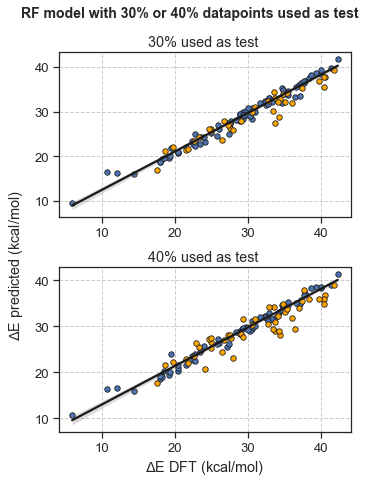

In [83]:
# Matplot to graph test including outlier window. IMPORTANT! Run the previous section with the best model first

os.chdir(w_dir+'\TS_energy')

sb.set(font_scale=1.2, style="ticks") #set styling preferences

Plotdata_train_30 = {'y_train_30': y_train_30, 'y_pred_RF_train_30': y_pred_RF_train_30} 
Plotdata_test_30 = {'y_test_30': y_test_30, 'y_pred_RF_test_30': y_pred_RF_test_30}

df_train_30 = pd.DataFrame.from_dict(Plotdata_train_30)
df_test_30 = pd.DataFrame.from_dict(Plotdata_test_30)

Plotdata_train_40 = {'y_train_40': y_train_40, 'y_pred_RF_train_40': y_pred_RF_train_40} 
Plotdata_test_40 = {'y_test_40': y_test_40, 'y_pred_RF_test_40': y_pred_RF_test_40}

df_train_40 = pd.DataFrame.from_dict(Plotdata_train_40)
df_test_40 = pd.DataFrame.from_dict(Plotdata_test_40)

# Build the plot
# Set up some features to plot the dots
color_train = 'b'
color_test = 'orange'
size = 30
alpha = 1 # from 0 (transparent) to 1 (opaque)

# Create subplot with a certain size and title
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,7))
fig.suptitle('RF model with 30% or 40% datapoints used as test', fontweight='bold', fontsize=14, y=0.97, x=0.58)

# This adjust the distance from the left side and from each plot
plt.subplots_adjust(left=0.32,hspace=0.3)

# Title of each subset
ax1.title.set_text("30% used as test ")
ax2.title.set_text("40% used as test ")

# Plot the data for 30% and 40%
points_train = ax1.scatter(df_train_30["y_train_30"], df_train_30["y_pred_RF_train_30"],
             c = color_train, s = size, edgecolor = 'k', linewidths = 0.8, alpha = alpha)

points_test = ax1.scatter(df_test_30["y_test_30"], df_test_30["y_pred_RF_test_30"],
             c = color_test, s = size, edgecolor = 'k', linewidths = 0.8, alpha = alpha)

points_train = ax2.scatter(df_train_40["y_train_40"], df_train_40["y_pred_RF_train_40"],
             c = color_train, s = size, edgecolor = 'k', linewidths = 0.8, alpha = alpha)

points_test = ax2.scatter(df_test_40["y_test_40"], df_test_40["y_pred_RF_test_40"],
             c = color_test, s = size, edgecolor = 'k', linewidths = 0.8, alpha = alpha)

# Add the regression line with a confidence interval based on the training sets
plot = sb.regplot("y_train_30", "y_pred_RF_train_30", data=df_train_30, scatter=False, color=".1", 
                  truncate = True, ax=ax1)

plot = sb.regplot("y_train_40", "y_pred_RF_train_40", data=df_train_40, scatter=False, color=".1", 
                  truncate = True, ax=ax2)

# Title of the graph and axis
plot = ax1.set(ylabel=None, xlabel=None)
plot = ax2.set(ylabel=None, xlabel='$\Delta$E DFT (kcal/mol)')
plt.text(-3, 57,'$\Delta$E predicted (kcal/mol)', rotation=90)

# Prints a summary of statistical values. The same number are obtained in Excel (tested just in case, since
# the R2 obtained from r2_score in sklearn is different than the R2 calculated with the Stats python package and Excel)
print("\nWith",round(i_30*100,2),"% used as test:",
      "\nR2_train =", round(r2_RF_train_30,2), "; MAE_train =", round(mae_RF_train_30,2), "; SD_train =", round(SD_train_30,2), "; RMSE_train =", round(rmse_RF_train_30,2), " kcal/mol.",
      "\nR2_test =", round(r2_RF_test_30,2), "; MAE_test =", round(mae_RF_test_30,2), "; SD_test =", round(SD_test_30,2), "; RMSE_test =", round(rmse_RF_test_30,2), " kcal/mol.")

print("\nWith",round(i_40*100,2),"% used as test:",
      "\nR2_train =", round(r2_RF_train_40,2), "; MAE_train =", round(mae_RF_train_40,2), "; SD_train =", round(SD_train_40,2), "; RMSE_train =", round(rmse_RF_train_40,2), " kcal/mol.",
      "\nR2_test =", round(r2_RF_test_40,2), "; MAE_test =", round(mae_RF_test_40,2),"; SD_test =", round(SD_test_40,2),  "; RMSE_test =", round(rmse_RF_test_40,2), " kcal/mol.")


# Add gridlines
ax1.grid(linestyle='--', linewidth=1)
ax2.grid(linestyle='--', linewidth=1)

# If you want to save the plot a png image, type True
graph = False
if graph != False:
 plt.savefig('RF_model_with_test_30.png', dpi=400)

plt.show()


In [84]:
# Check that the SMILES in the list correspond to the analogous fingerprints. For this, the type and features
# of the fingerprints generated do not matter so much (they'll be used only to check if the SMILES match
# # with their corresponding fingerprints)
mismatch=0
if best_fp_type == 'Morgan':
    for i in range(len(combined_database['Arenes_fp'])):
        if combined_database['Arenes_smiles'][i] is not np.nan and str(combined_database['Arenes_smiles'][i]) != 'None':
            check_fp_ar = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(combined_database['Arenes_smiles'][i]), radius=int(best_radius), nBits = int(best_bits))
            check_arr_ar = np.zeros((0,), dtype=np.int8)
            check_fp_np_ar = DataStructs.ConvertToNumpyArray(check_fp_ar, check_arr_ar)
            if check_arr_ar.tolist() != combined_database['Arenes_fp'][i].tolist():
                print('\nThe SMILES and fingerprints of', combined_database['Arenes_names'][i], 'do not match')
                mismatch = mismatch + 1
                
    for i in range(len(combined_database['Amines_fp'])):
        if combined_database['Amines_smiles'][i] is not np.nan and str(combined_database['Amines_smiles'][i]) != 'None':
            check_fp_ar = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(combined_database['Amines_smiles'][i]), radius=int(best_radius), nBits = int(best_bits))
            check_arr_ar = np.zeros((0,), dtype=np.int8)
            check_fp_np_ar = DataStructs.ConvertToNumpyArray(check_fp_ar, check_arr_ar)
            if check_arr_ar.tolist() != combined_database['Amines_fp'][i].tolist():
                print('\nThe SMILES and fingerprints of', combined_database['Amines_names'][i], 'do not match')
                mismatch = mismatch + 1

    for i in range(len(combined_database['Phosphines_fp'])):
        if combined_database['Phosphines_smiles'][i] is not np.nan and str(combined_database['Phosphines_smiles'][i]) != 'None':
            check_fp_ar = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(combined_database['Phosphines_smiles'][i]), radius=int(best_radius), nBits = int(best_bits))
            check_arr_ar = np.zeros((0,), dtype=np.int8)
            check_fp_np_ar = DataStructs.ConvertToNumpyArray(check_fp_ar, check_arr_ar)
            if check_arr_ar.tolist() != combined_database['Phosphines_fp'][i].tolist():
                print('\nThe SMILES and fingerprints of', combined_database['Phosphines_names'][i], 'do not match')
                mismatch = mismatch + 1

if best_fp_type == 'RDKit':
    for i in range(len(combined_database['Arenes_fp'])):
        if combined_database['Arenes_smiles'][i] is not np.nan and str(combined_database['Arenes_smiles'][i]) != 'None':
            check_fp_ar = Chem.RDKFingerprint(Chem.MolFromSmiles(combined_database['Arenes_smiles'][i]), maxPath=int(best_radius), fpSize=int(best_bits))
            check_arr_ar = np.zeros((0,), dtype=np.int8)
            check_fp_np_ar = DataStructs.ConvertToNumpyArray(check_fp_ar, check_arr_ar)
            if check_arr_ar.tolist() != combined_database['Arenes_fp'][i].tolist():
                print('\nThe SMILES and fingerprints of', combined_database['Arenes_names'][i], 'do not match')
                mismatch = mismatch + 1                   

    for i in range(len(combined_database['Amines_fp'])):
        if combined_database['Amines_smiles'][i] is not np.nan and str(combined_database['Amines_smiles'][i]) != 'None':
            check_fp_ar = Chem.RDKFingerprint(Chem.MolFromSmiles(combined_database['Amines_smiles'][i]), maxPath=int(best_radius), fpSize=int(best_bits))
            check_arr_ar = np.zeros((0,), dtype=np.int8)
            check_fp_np_ar = DataStructs.ConvertToNumpyArray(check_fp_ar, check_arr_ar)
            if check_arr_ar.tolist() != combined_database['Amines_fp'][i].tolist():
                print('\nThe SMILES and fingerprints of', combined_database['Amines_names'][i], 'do not match')
                mismatch = mismatch + 1     

    for i in range(len(combined_database['Phosphines_fp'])):
        if combined_database['Phosphines_smiles'][i] is not np.nan and str(combined_database['Phosphines_smiles'][i]) != 'None':
            check_fp_ar = Chem.RDKFingerprint(Chem.MolFromSmiles(combined_database['Phosphines_smiles'][i]), maxPath=int(best_radius), fpSize=int(best_bits))
            check_arr_ar = np.zeros((0,), dtype=np.int8)
            check_fp_np_ar = DataStructs.ConvertToNumpyArray(check_fp_ar, check_arr_ar)
            if check_arr_ar.tolist() != combined_database['Phosphines_fp'][i].tolist():
                print('\nThe SMILES and fingerprints of', combined_database['Phosphines_names'][i], 'do not match')
                mismatch = mismatch + 1     

if mismatch == 0:
    print('\nAll the SMILES used in the RF model match their corresponding fingerprints in "combined_database".')
else:
    pass      


All the SMILES used in the RF model match their corresponding fingerprints in "combined_database".


In [138]:
# Create combinations of fingerprints and predict values

os.chdir(w_dir+'\Databases')

# Specify which PHOSPHINE you want to work with
# Create all the possible combinations of arenes, amines and phosphines fingerprints and copy them into a csv file
# Put False if you already have the database in a csv file
create_new_database =False
# This is the phosphine to choose, if you pick 0 it is equivalent to PP01 and so on. You can choose 'all'
# but be aware that this will require a lot of memory (millions of options wills be generated)
phosphine_options = len(combined_database['Phosphines_fp']) 

# This parts copies all the data into a csv file. For now, I only use 1 type of phosphine at a time because this type
# of file is massive, but it is very easy to include new types of phosphines
if create_new_database == True:
    for k in range(phosphine_options):
        all_fp_combined, new_names_combined = [],[]
        for i in range(len(combined_database['Arenes_fp'])):
            if str(combined_database['Arenes_names'][i]) != 'nan' and str(combined_database['Arenes_names'][i]) != 'None':
                for j in range(len(combined_database['Amines_fp'])):
                    if str(combined_database['Amines_names'][j]) != 'nan' and str(combined_database['Amines_names'][j]) != 'None':
                        if str(combined_database['Phosphines_fp'][k]) != 'nan' and str(combined_database['Phosphines_fp'][k]) != 'None':
                            new_names_combined.append(np.concatenate((combined_database['Arenes_names'][i], 
                                                         combined_database['Amines_names'][j],combined_database['Phosphines_names'][k]), axis=None))
                            all_fp_combined.append(np.concatenate((combined_database['Arenes_fp'][i], 
                                                         combined_database['Amines_fp'][j], combined_database['Phosphines_fp'][k]), axis=None))

        y_pred_RF_new = RF.predict(all_fp_combined)
        
        fp_combined_database = dict ([('Components', new_names_combined),
                                    ('y_predicted', y_pred_RF_new)                              
                                                        ])

        df_combined_fp = DataFrame.from_dict(fp_combined_database, orient='index')
        df_combined_fp = df_combined_fp.transpose()

        combined_fp_excel = df_combined_fp.to_csv('Components_pp'+str(k+1)+'.csv', index = None, header=True)

    for k in range(phosphine_options):
        try:
            if k == 0:
                df_combined_fp = pd.read_csv('Components_pp'+str(k+1)+'.csv')

            else:
                df_combined_fp2 = pd.read_csv('Components_pp'+str(k+1)+'.csv')
                df_combined_fp = df_combined_fp.append(df_combined_fp2, ignore_index = True)

        except: pass
    print('The database of combined fingerprints was successfully created with', df_combined_fp['Components'].count(), 'combinations.')

# If the database was already created, this will load that file and put it in a pandas dataframe
if create_new_database == False:
    for k in range(phosphine_options):
        try:
            if k == 0:
                df_combined_fp = pd.read_csv('Components_pp'+str(k+1)+'.csv')
                
            else:
                df_combined_fp2 = pd.read_csv('Components_pp'+str(k+1)+'.csv')
                df_combined_fp = df_combined_fp.append(df_combined_fp2, ignore_index = True)
                
        except: pass
    print('The database of combined fingerprints was successfully loaded with', df_combined_fp['Components'].count(), 'combinations.')
    
# Divide the DFT E values list into 4 segments based on the kcal/mol range (not based on quartiles)
os.chdir(w_dir+'\TS_energy')
evolution_pd = pd.read_csv("TS_energies.csv")

range_y = (max(y)-min(y))
first_mark_y = min(y)
second_mark_y = min(y)+ (range_y/4)
third_mark_y = min(y)+ (2*(range_y/4))
fourth_mark_y = min(y)+ (3*(range_y/4))

evolution_pd = pd.read_csv("TS_energies.csv")

# Counts the number of points in each of 4 segments generated based on the energy values from 
# the DFT calcs (not based on quartiles)
avoid_repeat, first_points, second_points, third_points, fourth_points = [],[],[],[],[]
for i in range(len(evolution_pd['Activation_E'])):
    avoid_repeat.append(evolution_pd['Combined_names'][i])
    if evolution_pd['Activation_E'][i] >= first_mark_y and evolution_pd['Activation_E'][i] < second_mark_y:
        first_points.append(evolution_pd['Combined_names'][i])
    elif evolution_pd['Activation_E'][i] >= second_mark_y and evolution_pd['Activation_E'][i] < third_mark_y:
        second_points.append(evolution_pd['Combined_names'][i])
    elif evolution_pd['Activation_E'][i] >= third_mark_y and evolution_pd['Activation_E'][i] < fourth_mark_y:
        third_points.append(evolution_pd['Combined_names'][i])
    elif evolution_pd['Activation_E'][i] >= fourth_mark_y:
        fourth_points.append(evolution_pd['Combined_names'][i])

# This part will keep track of the global number of points in each section and will add new predictions
# to the less populated regions
updated_count = []
updated_count.append(len(first_points))
updated_count.append(len(second_points))
updated_count.append(len(third_points))
updated_count.append(len(fourth_points))

# Divide the new predicted E values list into 4 segments based on the kcal/mol range (not based on quartiles)
range_y_pred = (max(df_combined_fp['y_predicted'])-min(df_combined_fp['y_predicted']))
first_mark_y_pred = min(df_combined_fp['y_predicted'])
second_mark_y_pred = min(df_combined_fp['y_predicted'])+ (range_y_pred/4)
third_mark_y_pred = min(df_combined_fp['y_predicted'])+ (2*(range_y_pred/4))
fourth_mark_y_pred = min(df_combined_fp['y_predicted'])+ (3*(range_y_pred/4))

# First, it checks in what range the new randomly generated points are from the predicted values 
# (I used the range of the predicted values and not the original range because the original range 
# might be different). Then, if the new point is in the less populated range of the original dataset, 
# the point will be chosen to generate the input files to evolve the RF model.
evolution_points = []
count_added_points = 0
print('\nInitial distribution of datapoints along the E range:',
      '\nFirst region (lowest E):', updated_count[0], 'points;', 'Second region:', updated_count[1], 'points;',
      '\nThird region:', updated_count[2], 'points;', 'Fourth region (highest E):', updated_count[3], 'points.\n')

# Set the number of new points to evolve the RF
target_number = 50

for i in range(len(df_combined_fp['y_predicted'])):
    repeated = False
    if count_added_points == target_number:
        break
    else:
        for j in range(len(avoid_repeat)):
            if str(df_combined_fp['Components'][i]) == str(avoid_repeat[j]):
                repeated = True
        if repeated == False:
            random_n = random.randint(1,len(df_combined_fp['y_predicted']))
            if df_combined_fp['y_predicted'][random_n] >= first_mark_y_pred and df_combined_fp['y_predicted'][random_n] < second_mark_y_pred:                
                if updated_count[0] == min(updated_count):
                    evolution_points.append(df_combined_fp['Components'][random_n])
                    updated_count[0] = updated_count[0]+1
                    count_added_points = count_added_points+1
                    print('Point added to 1st region, predicted E =',round(df_combined_fp['y_predicted'][random_n],2),df_combined_fp['Components'][random_n])
            if df_combined_fp['y_predicted'][random_n] >= second_mark_y_pred and df_combined_fp['y_predicted'][random_n] < third_mark_y_pred:
                if updated_count[1] == min(updated_count):
                    evolution_points.append(df_combined_fp['Components'][random_n])
                    updated_count[1] = updated_count[1]+1
                    count_added_points = count_added_points+1
                    print('Point added to 2nd region, predicted E',round(df_combined_fp['y_predicted'][random_n],2),df_combined_fp['Components'][random_n])
            if df_combined_fp['y_predicted'][random_n] >= third_mark_y_pred and df_combined_fp['y_predicted'][random_n] < fourth_mark_y_pred:
                if updated_count[2] == min(updated_count):
                    evolution_points.append(df_combined_fp['Components'][random_n])
                    updated_count[2] = updated_count[2]+1
                    count_added_points = count_added_points+1
                    print('Point added to 3rd region, predicted E',round(df_combined_fp['y_predicted'][random_n],2),df_combined_fp['Components'][random_n])
            if df_combined_fp['y_predicted'][random_n] >= fourth_mark_y_pred:
                if updated_count[3] == min(updated_count):
                    evolution_points.append(df_combined_fp['Components'][random_n])
                    updated_count[3] = updated_count[3]+1
                    count_added_points = count_added_points+1
                    print('Point added to 4th region, predicted E',round(df_combined_fp['y_predicted'][random_n],2),df_combined_fp['Components'][random_n])


The database of combined fingerprints was successfully loaded with 1268864 combinations.

Initial distribution of datapoints along the E range: 
First region (lowest E): 4 points; Second region: 27 points; 
Third region: 48 points; Fourth region (highest E): 43 points.

Point added to 1st region, predicted E = 17.53 ['ar47' 'am358' 'pp04']
Point added to 1st region, predicted E = 17.03 ['ar405' 'am322' 'pp07']
Point added to 1st region, predicted E = 15.72 ['ar268' 'am340' 'pp06']
Point added to 1st region, predicted E = 15.75 ['ar159' 'am358' 'pp05']
Point added to 1st region, predicted E = 16.77 ['ar271' 'am384' 'pp01']
Point added to 1st region, predicted E = 17.35 ['ar267' 'am134' 'pp06']
Point added to 1st region, predicted E = 17.1 ['ar87' 'am342' 'pp03']
Point added to 1st region, predicted E = 16.41 ['ar407' 'am19' 'pp03']
Point added to 1st region, predicted E = 14.89 ['ar270' 'am19' 'pp05']
Point added to 1st region, predicted E = 15.77 ['ar176' 'am347' 'pp02']
Point added to


The 3 best combinations are:
                    Components  y_predicted
3488   ['ar08' 'am10' 'pp02']    10.109132
3497   ['ar08' 'am19' 'pp02']    11.187845
3930  ['ar08' 'am472' 'pp02']    11.230554


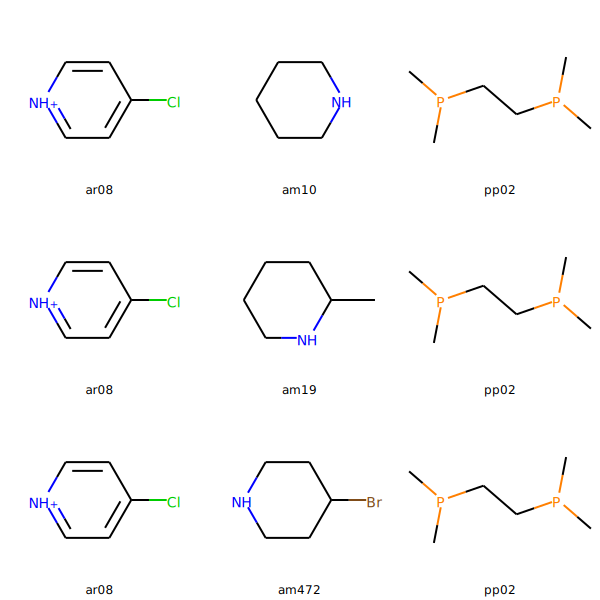

In [18]:
# This part prints which are the n best combinations from all the possibilities
# Choose the n best combinations
points_ranking = 3

sorted_values = df_combined_fp.sort_values(by=['y_predicted'])

print('\nThe', points_ranking, 'best combinations are:\n',
    sorted_values[0:points_ranking])

# The sorted list is split into different lines
lines_best_sorted_values = str(sorted_values[0:points_ranking]).split('\n')

best_pred_arenes, best_pred_amines, best_pred_phosphines = [],[],[]
for i in range(len(lines_best_sorted_values)):
    if len(lines_best_sorted_values[i].split()) > 2:
        # I get rid off all the undesired symbols and grab the corresponding components
        best_pred_arenes.append(lines_best_sorted_values[i].split()[1].replace('[', '').replace('\'', '').replace(']', ''))
        best_pred_amines.append(lines_best_sorted_values[i].split()[2].replace('[', '').replace('\'', '').replace(']', ''))
        best_pred_phosphines.append(lines_best_sorted_values[i].split()[3].replace('[', '').replace('\'', '').replace(']', ''))
    
comb_best_print, legend_best_print = [],[]
for i in range(len(best_pred_phosphines)):
    arene_comb = combined_database['Arenes_smiles'][combined_database['Arenes_names'].tolist().index(best_pred_arenes[i].replace(',', ''))]
    amine_comb = combined_database['Amines_smiles'][combined_database['Amines_names'].tolist().index(best_pred_amines[i].replace(',', ''))]
    phosphine_comb = combined_database['Phosphines_smiles'][combined_database['Phosphines_names'].tolist().index(best_pred_phosphines[i].replace(',', ''))]
    comb_best_print.append(arene_comb)
    comb_best_print.append(amine_comb)
    comb_best_print.append(phosphine_comb)
    legend_best_print.append(best_pred_arenes[i])
    legend_best_print.append(best_pred_amines[i])
    legend_best_print.append(best_pred_phosphines[i])

mol_best_to_print = [Chem.MolFromSmiles(smi) for smi in comb_best_print]
Draw.MolsToGridImage(mol_best_to_print, molsPerRow=3, legends=legend_best_print)



The 3 worse combinations are:
                  Components y_predicted
283801  [ar608, am15, pp01]     41.1144
9457     [ar20, am15, pp01]     41.1179
271873  [ar584, am15, pp01]     41.1374


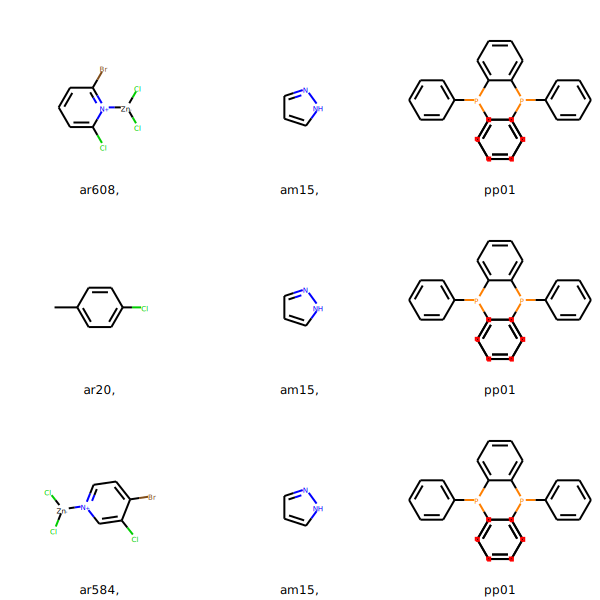

In [95]:
# This part prints which are the n worse combinations from all the possibilities
# Choose the n worse combinations
points_ranking = 3

sorted_values = df_combined_fp.sort_values(by=['y_predicted'])
    
print('\nThe', points_ranking, 'worse combinations are:\n',
    sorted_values[(-points_ranking-1):-1])

# The sorted list is split into different lines
lines_worse_sorted_values = str(sorted_values[(-points_ranking-1):-1]).split('\n')

worse_pred_arenes, worse_pred_amines, worse_pred_phosphines = [],[],[]
for i in range(len(lines_worse_sorted_values)):
    if len(lines_worse_sorted_values[i].split()) > 2:
        # I get rid off all the undesired symbols and grab the corresponding components
        worse_pred_arenes.append(lines_worse_sorted_values[i].split()[1].replace('[', '').replace('\'', '').replace(']', ''))
        worse_pred_amines.append(lines_worse_sorted_values[i].split()[2].replace('[', '').replace('\'', '').replace(']', ''))
        worse_pred_phosphines.append(lines_worse_sorted_values[i].split()[3].replace('[', '').replace('\'', '').replace(']', ''))
    
comb_worse_print, legend_worse_print = [],[]
for i in range(len(worse_pred_phosphines)):
    arene_comb = combined_database['Arenes_smiles'][combined_database['Arenes_names'].tolist().index(worse_pred_arenes[i].replace(',', ''))]
    amine_comb = combined_database['Amines_smiles'][combined_database['Amines_names'].tolist().index(worse_pred_amines[i].replace(',', ''))]
    phosphine_comb = combined_database['Phosphines_smiles'][combined_database['Phosphines_names'].tolist().index(worse_pred_phosphines[i].replace(',', ''))]
    comb_worse_print.append(arene_comb)
    comb_worse_print.append(amine_comb)
    comb_worse_print.append(phosphine_comb)
    legend_worse_print.append(worse_pred_arenes[i])
    legend_worse_print.append(worse_pred_amines[i])
    legend_worse_print.append(worse_pred_phosphines[i])
mol_worse_to_print = [Chem.MolFromSmiles(smi) for smi in comb_worse_print]
Draw.MolsToGridImage(mol_worse_to_print, molsPerRow=3, legends=legend_worse_print)


In [147]:
# Generating sdf files for the intermediates of the n randomly-generated combinations

# IMPORTANT!! ESPECIFY WHERE THE SDF TEMPLATES ARE AND EMPTY THIS FOLDER
os.chdir(w_dir+'\Generated_input\SDF')

generated_mol_files, generated_mol_names, generated_mol_smiles, INT_I_smiles = [],[],[],[]

# First I put all the combinations in 3 lists, one for each component
evolution_arenes_names, evolution_amines_names, evolution_phosphines_names = [],[],[]
for i in range(len(evolution_points)):
        # I get rid off all the undesired symbols and grab the corresponding components
        evolution_arenes_names.append(evolution_points[i].replace('[', '').replace('\'', '').replace(']', '').split()[0])
        evolution_amines_names.append(evolution_points[i].replace('[', '').replace('\'', '').replace(']', '').split()[1])
        evolution_phosphines_names.append(evolution_points[i].replace('[', '').replace('\'', '').replace(']', '').split()[2])

evolution_arenes_smiles, evolution_amines_smiles, evolution_phosphines_smiles = [],[],[]
for i in range(len(evolution_arenes_names)):
    evolution_arenes_smiles.append(combined_database['Arenes_smiles'][combined_database['Arenes_names'].tolist().index(evolution_arenes_names[i])])
    evolution_amines_smiles.append(combined_database['Amines_smiles'][combined_database['Amines_names'].tolist().index(evolution_amines_names[i])])
    evolution_phosphines_smiles.append(combined_database['Phosphines_smiles'][combined_database['Phosphines_names'].tolist().index(evolution_phosphines_names[i])])

#definition to type of reaction pathways
PdCl2 = Chem.MolFromSmiles('Cl[Pd]Cl')
PdCl2 = Chem.AddHs(PdCl2)

# Generate MOL from SMILES
for i in range(len(evolution_arenes_names)):
    Aromatic = Chem.MolFromSmiles(evolution_arenes_smiles[i])
    Amine = Chem.MolFromSmiles(evolution_amines_smiles[i])
    Phosphine = Chem.MolFromSmiles(evolution_phosphines_smiles[i])

    #addition of Hydrogens for SMIRKS string to get recognised.
    Aromatic = Chem.AddHs(Aromatic)
    Amine = Chem.AddHs(Amine)
    Phosphine = Chem.AddHs(Phosphine)

    #definition of all INT_I generation
    # NOTES on SMIRKS: the order of reagents defined in int_i MUST be the same as the
    # reaction parts defined in rxn_i
    # I've use numbers to map the atoms in reagents and products. The numbers can be any number
    # and they can be removed (i.e. no mapped reaction)
    # For aliphatic atoms, CAPITAL letters. For aromatic atoms, lowercase letters.
    rxn_1 = AllChem.ReactionFromSmarts('[P:1].[Pd:3][Cl:4]>>[P+:1]([Pd:3]).Cl')
    rxn_2 = AllChem.ReactionFromSmarts('([P:1].[Pd:2]([P+:3])[Cl:4])>>[P+:1][Pd:2][P+:3].Cl')
    rxn_3 = AllChem.ReactionFromSmarts('[Pd:1].[c:2][Cl:3]>>[c:2][Pd:1][Cl:3]')
    rxn_4 = AllChem.ReactionFromSmarts('[Pd:3][Cl:4].[N:1]([H:2])>>[N:1]([Pd:3]).Cl')
    rxn_4_with_N_ar = AllChem.ReactionFromSmarts('[Pd:3][Cl:4].[n:1]([H:2])>>[n:1]([Pd:3]).Cl')

    int_1 = rxn_1.RunReactants((Phosphine, PdCl2))[0][0]
    int_2 = rxn_2.RunReactants((int_1,))[0][0]
    int_3 = rxn_3.RunReactants((int_2, Aromatic))[0][0]
    try: INT_I = rxn_4.RunReactants((int_3, Amine))[0][0]
    except: INT_I = rxn_4_with_N_ar.RunReactants((int_3, Amine))[0][0]
    
    # I included this because for some reason if I don't include this the code below fails
    INT_I = Chem.RemoveHs(INT_I)
    generated_mol_files.append(INT_I)
    name_title = evolution_arenes_names[i] + '_' + evolution_amines_names[i] + '_' + evolution_phosphines_names[i]
    generated_mol_names.append(name_title)
    generated_mol_smiles.append(Chem.MolToSmiles(INT_I))

# This part is only for creating sdf files of Int-I (with tetrahedral geometry). 
# I decided to do constrained RDKit optimizations using templates to 
# (i) ensure that the conformations of Ints and TSs are the same and (ii) less failed optimizations
# For some reason, the last element of generated_mol_files gets corrupted when creating 
# SDF files. I add a DUMMY point at the end just to avoid this
generated_mol_files.append(Chem.RemoveHs(Chem.MolFromSmiles('CC')))
generated_mol_smiles.append('CC')
generated_mol_names.append('END')

for i in range(len(generated_mol_files)):
        rct = Chem.AddHs(generated_mol_files[i])
        # When I try to get more conformers (i.e. numConfs=10) it doesn't work, I only get
        # 1 conformer. HOWEVER, if you don't use numConfs =10, the optimized structure
        # is quite bad. It looks like rdkit makes 10 conformers to optimize with MM and gives
        # you the best
        cids = AllChem.EmbedMultipleConfs(rct, numConfs=10, numThreads=0)
        res = AllChem.MMFFOptimizeMoleculeConfs(rct, numThreads=0)
        rmslist = []
        AllChem.AlignMolConformers(rct, RMSlist=rmslist)
        try: 
                w = Chem.SDWriter('Int_I_'+generated_mol_names[i]+'.sdf')
                w.write(rct)
        except: pass


In [148]:
# Convert SDF files into COM files ready to run

# Folder with the SDF templates
os.chdir(w_dir+'\Generated_input\SDF')

Int_I_sdf_files = glob.glob('Int_I_*.sdf')

obConversion = ob.OBConversion()
obConversion.SetInAndOutFormats("sdf", "com")
mol = ob.OBMol()

for file in Int_I_sdf_files:
        os.chdir(w_dir+'\Generated_input\SDF')
        obConversion.ReadFile(mol, file)
        os.chdir(w_dir+'\Generated_input\COM')
        obConversion.WriteFile(mol, file.split('.')[0]+'.com')

# Modify these parameters for the Gaussian input files
n_of_processors = '24'
memory = '96GB'
keywords_opt_semiemp = 'opt=(calcfc,recalc=30,maxcycles=300) pm6'
keywords_opt_DFT = 'wb97xd/genecp opt=(calcfc,recalc=30,maxcycles=200) freq=noraman scrf=(smd,solvent=toluene) geom=check'
keywords_SP = 'wb97xd/def2qzvpp scrf=(smd,solvent=toluene) geom=check'

# If more types of atoms are included, add them here

possible_atoms = ['N', 'P', 'C', 'Si', 'B', 'H', 'Zn', 'S', 'O', 'F', 'Br', 'Cl']

Int_I_com_files = glob.glob('Int_I_*.com')

for file in Int_I_com_files:
    atoms_6311 = []
    read_lines = open(file,"r").readlines()
    fileout = open(file, "w")
    #Write input for part 1 (opt with semi-empirical method)
    fileout.write("%chk="+file.split('.')[0]+".chk"+"\n")
    fileout.write("%mem="+memory+"\n")
    fileout.write("%nprocshared="+n_of_processors+"\n")
    fileout.write("# "+keywords_opt_semiemp+"\n")
    fileout.write("\n")
    fileout.write(file.split('.')[0]+"\n")
    fileout.write("\n")
    # this accounts for misassignment of charges when generating SDF files
    if read_lines[4].find('0  1') > -1 or read_lines[4].find('2  1') > -1:
        fileout.write('0  1\n')
    elif read_lines[4].find('0  2') > -1 or read_lines[4].find('3  1') > -1:
        fileout.write('1  1\n')
    for i in range(5,len(read_lines)):
        if read_lines[i].split(' ')[0] not in atoms_6311 and read_lines[i].split(' ')[0] in possible_atoms: 
            atoms_6311.append(read_lines[i].split(' ')[0])
        fileout.write(read_lines[i])
    #Write input for part 2 (opt + freq with DFT)
    fileout.write("--Link1--"+"\n") 
    fileout.write("%chk="+file.split('.')[0]+".chk"+"\n")
    fileout.write("%mem="+memory+"\n")
    fileout.write("%nprocshared="+n_of_processors+"\n")
    fileout.write("# "+keywords_opt_DFT+"\n")
    fileout.write("\n")
    fileout.write(file.split('.')[0]+"\n")
    fileout.write("\n")
    # this accounts for misassignment of charges when generating SDF files
    if read_lines[4].find('0  1') > -1 or read_lines[4].find('2  1') > -1:
        fileout.write('0  1\n')
    elif read_lines[4].find('0  2') > -1 or read_lines[4].find('3  1') > -1:
        fileout.write('1  1\n')
    fileout.write("\n") 
    # prints the genecp part. atoms_6311 stores the atoms to include in the 6-311g(d) basis sets from that structure,
    # since if there are atoms in that line that are not used Gaussian crushes
    for i in range(len(atoms_6311)):
        fileout.write(atoms_6311[i]+' ') 
    fileout.write('0\n')
    fileout.write('6-311g(d)\n')
    fileout.write('****\n')  
    fileout.write('Pd     0\n')
    fileout.write('S   3   1.00\n')
    fileout.write('     2.7870000             -1.6102393\n')
    fileout.write('     1.9650000              1.8489842\n')
    fileout.write('     0.6243000              0.6037492\n')
    fileout.write('S   4   1.00\n')
    fileout.write('     2.7870000              1.3540775\n')
    fileout.write('     1.9650000             -1.6780848\n')
    fileout.write('     0.6243000             -0.8559381\n')
    fileout.write('     0.1496000              1.0200299\n')
    fileout.write('S   1   1.00\n')
    fileout.write('     0.0436000              1.0000000\n')
    fileout.write('P   3   1.00\n')
    fileout.write('     5.9990000             -0.1034910\n')
    fileout.write('     1.4430000              0.7456952\n')
    fileout.write('     0.5264000              0.3656494\n')
    fileout.write('P   2   1.00\n')
    fileout.write('     0.7368000              0.0763285\n')
    fileout.write('     0.0899000              0.9740065\n')
    fileout.write('P   1   1.00\n')
    fileout.write('     0.0262000              1.0000000\n')
    fileout.write('D   3   1.00\n')
    fileout.write('     6.0910000              0.0376146\n')
    fileout.write('     1.7190000              0.5200479\n')
    fileout.write('     0.6056000              0.5706071\n')
    fileout.write('D   1   1.00\n')
    fileout.write('     0.1883000              1.0000000\n')
    fileout.write('F   1   1.00\n')
    fileout.write('     1.4720000              1.0000000\n')
    fileout.write('****\n\n')
    fileout.write('Pd 0\n')
    fileout.write('LANL2DZ\n\n')
    #Write input for part 3 (SP calculation with DFT)
    fileout.write("--Link1--"+"\n") 
    fileout.write("%chk="+file.split('.')[0]+".chk"+"\n")
    fileout.write("%mem="+memory+"\n")
    fileout.write("%nprocshared="+n_of_processors+"\n")
    fileout.write("# "+keywords_SP+"\n")
    fileout.write("\n")
    fileout.write(file.split('.')[0]+"\n")
    fileout.write("\n")
    # this accounts for misassignment of charges when generating SDF files
    if read_lines[4].find('0  1') > -1 or read_lines[4].find('2  1') > -1:
        fileout.write('0  1\n')
    elif read_lines[4].find('0  2') > -1 or read_lines[4].find('3  1') > -1:
        fileout.write('1  1\n')
    fileout.write("\n")
print(len(Int_I_com_files)-1, 'Int_I input files were generated!')

50 Int_I input files were generated!


In [149]:
# Generate TS

# load the core SDF file
# ESPECIFY WHERE THE SDF TEMPLATES ARE 
os.chdir(w_dir+'\TEMPLATE')
     
# Especify the name of the template here. This is slightly tricky - you can't generate the SDF template
# with GaussView because MolFromMolFile doesn't seem to support it. However, the SDF templates can be
# generated with PyMol
# Also, hybridization and type of the phosphine linker (P-C-C-P bonds) is very 
# important. I created multiple templates to account for the different types of phosphine ligands
core_sdf = glob.glob('template*.sdf')
all_cores_mol = []
for i in range(len(core_sdf)):
    try: 
        core_mol = Chem.MolFromMolFile(core_sdf[i],removeHs=False)
        all_cores_mol.append(core_mol)
    except: print(core_sdf[i], 'couldn\'t be converted into a mol file.')

# Very important to not add hydrogen atoms to the mol files before the 'match' process
for i in range(len(generated_mol_files)):
    INT_I_mol = generated_mol_smiles[i]
    Int_I_mol = Chem.MolFromSmiles(INT_I_mol)
    Int_I_mol = Chem.RemoveHs(Int_I_mol)
    # This functions decides which core to use from all the options in the TEMPLATE folder based on which
    # template is more similar to the Int_I structure (based on the amount of atom matches)
    core_mol = ''
    count_match = 0
    best_match = ''
    core_smile = ''
    for j in range(len(all_cores_mol)):
        try: 
            # For some reason, when I generate cores with removeHs=True there are some templates that don't work with 
            # match. Since both core and Int_I_mol mustn't contain H atoms to generate matches, I just added this 
            all_cores_mol[j] = Chem.RemoveHs(all_cores_mol[j])
            match_indiv = Int_I_mol.GetSubstructMatch(all_cores_mol[j])
            if len(match_indiv) > count_match:
                    count_match = len(match_indiv)
                    core_mol = all_cores_mol[j]
                    best_match = match_indiv
                    core_smile = Chem.MolToSmiles(all_cores_mol[j])
        except: print('No match was possible for',all_cores_mol[j])

    match = best_match

    try: print('Core template', core_sdf[all_cores_mol.index(core_mol)] , 'is the best template for', generated_mol_names[i],'.')
    except: print('There were no matches of', generated_mol_names[i],'with the cores.')
    
#     I add Hs before the final TS geometries are generated, that way the final sdf files
#     will contain Hs
    Int_I_mol = Chem.AddHs(Int_I_mol)

    # Definition of some parameters that will be used below
    confs, stereo, ez, conf_rms, conf_energy, min_energy, e_window, force_constant = [], [], [], [], [], 10e10, 25, 10000

    # look for stereochemical elements that will be used to match against new conformers
    for j,cip in Chem.FindMolChiralCenters(Int_I_mol):
        stereo.append([j,cip])
    for j, bond in enumerate(Int_I_mol.GetBonds()):
        if str(bond.GetStereo()) != 'STEREONONE':
            ez.append([j, bond.GetStereo()])

    coreConfId=-1
    # Choosing the type of force field
    ff = "UFF"

    # Force field parameters
    if ff == "MMFF":
            GetFF = lambda x,confId=-1:AllChem.MMFFGetMoleculeForceField(x,AllChem.MMFFGetMoleculeProperties(x),confId=confId)
    elif ff == "UFF":
            GetFF = lambda x,confId=-1:AllChem.UFFGetMoleculeForceField(x)
    else: print('   Force field {} not supported!'.format(options.ff)); sys.exit()
    getForceField=GetFF

    # Especify the number of conformers to try in the constrained optimization
    num_confs = 10

    for j in range(num_confs):
#         print('Attempting to generate {} Conformers'.format(num_confs))
#         Int_I_mol, rms, energy, config = AllChem.ConstrainedEmbed(Int_I_mol,core_mol, useTethers=True,randomseed=-1,getForceField=GetFF)

        randomseed=-1
        if not match:
            break
        
        # This part selects which atoms from Int_I are the atoms of the core
        coordMap = {}
        try:
            coreConf = core_mol.GetConformer(coreConfId)
        except: 
            pass
        for k, idxI in enumerate(match):
            corePtI = coreConf.GetAtomPosition(k)
            coordMap[idxI] = corePtI
        # This is the original version, if it doesn't work without coordMap I'll come back to it later
        ci = AllChem.EmbedMolecule(Int_I_mol, coordMap=coordMap, randomSeed=randomseed)
#         ci = AllChem.EmbedMolecule(Int_I_mol, randomSeed=randomseed)
        if ci < 0:    print('Could not embed molecule.')

        algMap = [(k, l) for l, k in enumerate(match)]

        # Two strategies to align core and Int_I: (1) useTethers False and (2) useTethers True. You can choose 
        # and decide which method is better. For me, I got better results when using useTethers True
        useTethers = True
        # In this part, the constrained optimization takes place
        if not useTethers:
            # clean up the conformation
            ff = getForceField(Int_I_mol, confId=0)
            for k, idxI in enumerate(match):
                for l in range(k + 1, len(match)):
                    idxJ = match[l]
                    d = coordMap[idxI].Distance(coordMap[idxJ])
                    ff.AddDistanceConstraint(idxI, idxJ, d, d, force_constant)
            ff.Initialize()
            n = 4
            more = ff.Minimize()
            while more and n:
                more = ff.Minimize()
                n -= 1
            energy = ff.CalcEnergy()
            # rotate the embedded conformation onto the core_mol:
            rms = rdMolAlign.AlignMol(Int_I_mol, core_mol, atomMap=algMap)
        else:
            # rotate the embedded conformation onto the core_mol:
            try:
                rms = rdMolAlign.AlignMol(Int_I_mol, core_mol, atomMap=algMap)
                ff = getForceField(Int_I_mol, confId=0)
                conf = core_mol.GetConformer()
                for k in range(core_mol.GetNumAtoms()):
                    p = conf.GetAtomPosition(k)
                    q = Int_I_mol.GetConformer().GetAtomPosition(k)
                    pIdx = ff.AddExtraPoint(p.x, p.y, p.z, fixed=True) - 1
                    ff.AddDistanceConstraint(pIdx, match[k], 0, 0, force_constant)
                ff.Initialize()
                n = 4
                more = ff.Minimize(energyTol=1e-5, forceTol=1e-4)
                while more and n:
                    more = ff.Minimize(energyTol=1e-5, forceTol=1e-4)
                    n -= 1
                # realign
                energy = ff.CalcEnergy()
                rms = rdMolAlign.AlignMol(Int_I_mol, core_mol, atomMap=algMap)
            except:
                break
        
        # This part is related to assigning stereochemistry
        new_stereo, new_ez, config = [], [], 0
        
        for atom in Int_I_mol.GetAtoms():
            atom.UpdatePropertyCache()
        AllChem.AssignAtomChiralTagsFromStructure(Int_I_mol)
        AllChem.AssignStereochemistry(Int_I_mol, True, True, True)

        for k,cip in Chem.FindMolChiralCenters(Int_I_mol):
            new_stereo.append([k,cip])

        for oldcip, newcip in zip(stereo,new_stereo):
            if oldcip != newcip: config += 1

        for k, bond in enumerate(Int_I_mol.GetBonds()):
            if str(bond.GetStereo()) != 'STEREONONE':
                #print(bond.GetStereo())
                new_ez.append([k, bond.GetStereo()])

        for oldez, newez in zip(ez,new_ez):
            if oldez != newez: config += 1
        # This part is  on charge of removing conformers with high energies and duplicates. 
        # For both cases, only energy values are used
        if config == 0:
            if rms not in conf_rms and energy not in conf_energy:
                dup = 0
                for conf_e in conf_energy:
                    if abs(conf_e - energy) < 0.01: dup = 1; break
                if dup == 0:
                    if energy < min_energy + e_window:
                        conf_rms.append(rms); conf_energy.append(energy); min_energy = min(conf_energy)
                        confs.append(Chem.Mol(Int_I_mol,False,0))
                        print('   {:<3}   New conformer! RMS {:6.3f}, E {:6.3f}'.format(i+1, rms, energy))
                    else:
                        pass; print((j+1), '   Rejected due to energy!')
                else: pass; print((j+1), '   Rejected due to duplicate!')
        else: pass; print((j+1), '   Rejected due to stereochemistry!')
    os.chdir(w_dir+'\Generated_input\SDF')
    w = Chem.SDWriter('TS_I_'+generated_mol_names[i]+'.sdf')
    for j,conf in enumerate(confs):
        w.write(conf)
    w.close()

Core template template_4Py_Si_pp04.sdf is the best template for ar47_am358_pp04 .
   1     New conformer! RMS  0.003, E 86.285
2    Rejected due to energy!
   1     New conformer! RMS  0.003, E 87.709
4    Rejected due to energy!
5    Rejected due to duplicate!
6    Rejected due to energy!
   1     New conformer! RMS  0.003, E 86.180
8    Rejected due to duplicate!
   1     New conformer! RMS  0.004, E 87.500
   1     New conformer! RMS  0.004, E 102.705
There were no matches of ar405_am322_pp07 with the cores.
There were no matches of ar268_am340_pp06 with the cores.
Core template template_2Py_Si_pp06.sdf is the best template for ar159_am358_pp05 .
   4     New conformer! RMS  0.004, E 148.991
   4     New conformer! RMS  0.004, E 148.120
3    Rejected due to duplicate!
4    Rejected due to duplicate!
   4     New conformer! RMS  0.005, E 164.798
6    Rejected due to duplicate!
7    Rejected due to duplicate!
8    Rejected due to duplicate!
9    Rejected due to duplicate!
10    Reject

2    Rejected due to energy!
   36    New conformer! RMS  0.004, E 245.724
   36    New conformer! RMS  0.004, E 246.056
   36    New conformer! RMS  0.004, E 249.360
   36    New conformer! RMS  0.004, E 249.670
   36    New conformer! RMS  0.004, E 245.830
8    Rejected due to energy!
9    Rejected due to energy!
   36    New conformer! RMS  0.004, E 241.273
Core template template_4Py_pp06.sdf is the best template for ar08_am182_pp05 .
   37    New conformer! RMS  0.004, E 197.139
   37    New conformer! RMS  0.004, E 168.415
3    Rejected due to duplicate!
   37    New conformer! RMS  0.004, E 151.247
5    Rejected due to duplicate!
6    Rejected due to duplicate!
7    Rejected due to duplicate!
8    Rejected due to energy!
9    Rejected due to energy!
10    Rejected due to duplicate!
There were no matches of ar101_am169_pp06 with the cores.
There were no matches of ar460_am200_pp06 with the cores.
Core template template_4Py_pp04.sdf is the best template for ar243_am325_pp04 .
   40

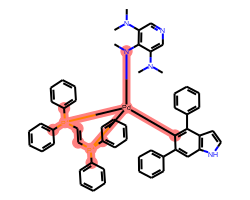

In [142]:
# Cool way of representing template/TS match

from rdkit.Chem.Draw import rdDepictor
rdDepictor.SetPreferCoordGen(True)
IPythonConsole.molSize = (250,200)

m = Chem.MolFromSmiles('CN(C)c1cncc(N(C)C)c1N(C)[Pd]1(c2c(-c3ccccc3)cc3[nH]ccc3c2-c2ccccc2)[P+](c2ccccc2)(c2ccccc2)C=C[P+]1(c1ccccc1)c1ccccc1')
rdDepictor.Compute2DCoords(m)

core = Chem.MolFromSmiles('C[P+]1(C)C=C[P+](C)(C)[Pd]1(C)N')
m.GetSubstructMatch(core)
m

In [157]:
# Generate COM files for the TS
# load the core SDF file
# ESPECIFY WHERE TO GENERATE TS 
os.chdir(w_dir+'\Generated_input\SDF')
TS_I_sdf = glob.glob('TS_I_*.sdf')
TS_I_sdf.append('END')

# Convert the SDF files into COM files
obConversion = ob.OBConversion()
obConversion.SetInAndOutFormats("sdf", "com")
mol = ob.OBMol()

for file in TS_I_sdf:
    os.chdir(w_dir+'\Generated_input\SDF')
    obConversion.ReadFile(mol, file)
    os.chdir(w_dir+'\Generated_input\COM')
    obConversion.WriteFile(mol, file.split('.')[0]+'.com')

# If more types of atoms are included, add them here. This is to include the atoms in the GENECP option
possible_atoms = ['N', 'P', 'C', 'Si', 'B', 'H', 'Zn', 'S', 'O', 'F', 'Br', 'Cl']

# Modify these parameters for the Gaussian input files
n_of_processors = '24'
memory = '96GB'
keywords_opt_modred = 'opt=(calcfc,recalc=30,maxcycles=200,modred,loose) wb97xd/genecp'
keywords_opt_DFT = 'wb97xd/genecp opt=(calcfc,ts,noeigen,recalc=30,maxcycles=200,maxstep=5) freq=noraman scrf=(smd,solvent=toluene) geom=check'
keywords_SP = 'wb97xd/def2qzvpp scrf=(smd,solvent=toluene) geom=check'

# This converts SDF to MOL
for i in range(len(TS_I_sdf)):
    os.chdir(w_dir+'\Generated_input\SDF')
    if TS_I_sdf[i] is not 'END.sdf':
        try:
            file_sdf = Chem.MolFromMolFile(TS_I_sdf[i],removeHs=False)
            # Get the position of the atoms to freeze in the constrained optimization (N and C atoms bonded to Pd). 
            # I included +1 in GetIdx() because the atom list in rdkit starts from 0 but in Gaussian the atom list starts from 1
            freezing_atoms = []
            for atom in file_sdf.GetAtoms():
                if atom.GetSymbol() == 'N' or atom.GetSymbol() == 'C':
                    # This part gets the neighboring atoms of N and C atoms. This is designed to find the atoms linked to Pd.
                    atom_neigh = file_sdf.GetAtomWithIdx(atom.GetIdx())
                    for neigh in atom_neigh.GetNeighbors():
                        if neigh.GetSymbol() == 'Pd':
                            freezing_atoms.append(atom.GetIdx()+1)
        except:
            pass
    os.chdir(w_dir+'\Generated_input\COM')
    # I had to include a DUMMY name at the end just to close the for loop that generates COM. If I don't add that point,
    # the last point of the for loop gets corrupted
    file = TS_I_sdf[i].split('.')[0]+'.com'
    atoms_6311 = []
    read_lines = open(file,"r").readlines()
    fileout = open(file, "w")

    #Write input for part 1 (opt with semi-empirical method)
    fileout.write("%chk="+file.split('.')[0]+".chk"+"\n")
    fileout.write("%mem="+memory+"\n")
    fileout.write("%nprocshared="+n_of_processors+"\n")
    fileout.write("# "+keywords_opt_modred+"\n")
    fileout.write("\n")
    fileout.write(file.split('.')[0]+"\n")
    fileout.write("\n")
    # this accounts for misassignment of charges when generating SDF files
    if read_lines[4].find('0  1') > -1 or read_lines[4].find('2  1') > -1:
        fileout.write('0  1\n')
    elif read_lines[4].find('0  2') > -1 or read_lines[4].find('3  1') > -1:
        fileout.write('1  1\n')
    for j in range(5,len(read_lines)):
        if read_lines[j].split(' ')[0] not in atoms_6311 and read_lines[j].split(' ')[0] in possible_atoms: 
            atoms_6311.append(read_lines[j].split(' ')[0])
        fileout.write(read_lines[j])
    fileout.write('B ')
    if TS_I_sdf[i] != 'END':
        for j in range(len(freezing_atoms)):
            fileout.write(str(freezing_atoms[j])+' ')
    fileout.write('F\n\n') 
    for j in range(len(atoms_6311)):
        fileout.write(atoms_6311[j]+' ') 
    # prints the genecp part. atoms_6311 stores the atoms to include in the 6-311g(d) basis sets from that structure,
    # since if there are atoms in that line that are not used Gaussian crushes
    fileout.write('0\n')
    fileout.write('6-31g(d)\n')
    fileout.write('****\n')  
    fileout.write('Pd     0\n')
    fileout.write('S   3   1.00\n')
    fileout.write('     2.7870000             -1.6102393\n')
    fileout.write('     1.9650000              1.8489842\n')
    fileout.write('     0.6243000              0.6037492\n')
    fileout.write('S   4   1.00\n')
    fileout.write('     2.7870000              1.3540775\n')
    fileout.write('     1.9650000             -1.6780848\n')
    fileout.write('     0.6243000             -0.8559381\n')
    fileout.write('     0.1496000              1.0200299\n')
    fileout.write('S   1   1.00\n')
    fileout.write('     0.0436000              1.0000000\n')
    fileout.write('P   3   1.00\n')
    fileout.write('     5.9990000             -0.1034910\n')
    fileout.write('     1.4430000              0.7456952\n')
    fileout.write('     0.5264000              0.3656494\n')
    fileout.write('P   2   1.00\n')
    fileout.write('     0.7368000              0.0763285\n')
    fileout.write('     0.0899000              0.9740065\n')
    fileout.write('P   1   1.00\n')
    fileout.write('     0.0262000              1.0000000\n')
    fileout.write('D   3   1.00\n')
    fileout.write('     6.0910000              0.0376146\n')
    fileout.write('     1.7190000              0.5200479\n')
    fileout.write('     0.6056000              0.5706071\n')
    fileout.write('D   1   1.00\n')
    fileout.write('     0.1883000              1.0000000\n')
    fileout.write('F   1   1.00\n')
    fileout.write('     1.4720000              1.0000000\n')
    fileout.write('****\n\n')
    fileout.write('Pd 0\n')
    fileout.write('LANL2DZ\n\n')

    #Write input for part 2 (opt + freq with DFT)
    fileout.write("--Link1--"+"\n") 
    fileout.write("%chk="+file.split('.')[0]+".chk"+"\n")
    fileout.write("%mem="+memory+"\n")
    fileout.write("%nprocshared="+n_of_processors+"\n")
    fileout.write("# "+keywords_opt_DFT+"\n")
    fileout.write("\n")
    fileout.write(file.split('.')[0]+"\n")
    fileout.write("\n")
    # this accounts for misassignment of charges when generating SDF files
    if read_lines[4].find('0  1') > -1 or read_lines[4].find('2  1') > -1:
        fileout.write('0  1\n')
    elif read_lines[4].find('0  2') > -1 or read_lines[4].find('3  1') > -1:
        fileout.write('1  1\n')
    fileout.write("\n")
    # prints the genecp part. atoms_6311 stores the atoms to include in the 6-311g(d) basis sets from that structure,
    # since if there are atoms in that line that are not used Gaussian crushes
    for i in range(len(atoms_6311)):
        fileout.write(atoms_6311[i]+' ') 
    fileout.write('0\n')
    fileout.write('6-311g(d)\n')
    fileout.write('****\n')  
    fileout.write('Pd     0\n')
    fileout.write('S   3   1.00\n')
    fileout.write('     2.7870000             -1.6102393\n')
    fileout.write('     1.9650000              1.8489842\n')
    fileout.write('     0.6243000              0.6037492\n')
    fileout.write('S   4   1.00\n')
    fileout.write('     2.7870000              1.3540775\n')
    fileout.write('     1.9650000             -1.6780848\n')
    fileout.write('     0.6243000             -0.8559381\n')
    fileout.write('     0.1496000              1.0200299\n')
    fileout.write('S   1   1.00\n')
    fileout.write('     0.0436000              1.0000000\n')
    fileout.write('P   3   1.00\n')
    fileout.write('     5.9990000             -0.1034910\n')
    fileout.write('     1.4430000              0.7456952\n')
    fileout.write('     0.5264000              0.3656494\n')
    fileout.write('P   2   1.00\n')
    fileout.write('     0.7368000              0.0763285\n')
    fileout.write('     0.0899000              0.9740065\n')
    fileout.write('P   1   1.00\n')
    fileout.write('     0.0262000              1.0000000\n')
    fileout.write('D   3   1.00\n')
    fileout.write('     6.0910000              0.0376146\n')
    fileout.write('     1.7190000              0.5200479\n')
    fileout.write('     0.6056000              0.5706071\n')
    fileout.write('D   1   1.00\n')
    fileout.write('     0.1883000              1.0000000\n')
    fileout.write('F   1   1.00\n')
    fileout.write('     1.4720000              1.0000000\n')
    fileout.write('****\n\n')
    fileout.write('Pd 0\n')
    fileout.write('LANL2DZ\n\n')

    #Write input for part 3 (SP calculation with DFT)
    fileout.write("--Link1--"+"\n") 
    fileout.write("%chk="+file.split('.')[0]+".chk"+"\n")
    fileout.write("%mem="+memory+"\n")
    fileout.write("%nprocshared="+n_of_processors+"\n")
    fileout.write("# "+keywords_SP+"\n")
    fileout.write("\n")
    fileout.write(file.split('.')[0]+"\n")
    fileout.write("\n")
    # this accounts for misassignment of charges when generating SDF files
    if read_lines[4].find('0  1') > -1 or read_lines[4].find('2  1') > -1:
        fileout.write('0  1\n')
    elif read_lines[4].find('0  2') > -1 or read_lines[4].find('3  1') > -1:
        fileout.write('1  1\n')
    fileout.write("\n")
    fileout.close()
print(len(TS_I_sdf)-1, 'TS_I input files were generated!')

52
['TS_I_ar07_am01_pp07.sdf', 'TS_I_ar07_am58_pp03.sdf', 'TS_I_ar08_am105_pp03.sdf', 'TS_I_ar08_am158_pp8.sdf', 'TS_I_ar08_am182_pp05.sdf', 'TS_I_ar08_am316_pp03.sdf', 'TS_I_ar08_am332_pp07.sdf', 'TS_I_ar101_am169_pp06.sdf', 'TS_I_ar138_am88_pp07.sdf', 'TS_I_ar149_am225_pp8.sdf', 'TS_I_ar159_am358_pp05.sdf', 'TS_I_ar167_am226_pp8.sdf', 'TS_I_ar176_am24_pp05.sdf', 'TS_I_ar176_am347_pp02.sdf', 'TS_I_ar179_am201_pp04.sdf', 'TS_I_ar227_am58_pp06.sdf', 'TS_I_ar232_am351_pp03.sdf', 'TS_I_ar239_am347_pp02.sdf', 'TS_I_ar243_am325_pp04.sdf', 'TS_I_ar248_am384_pp8.sdf', 'TS_I_ar253_am210_pp01.sdf', 'TS_I_ar254_am25_pp8.sdf', 'TS_I_ar256_am208_pp05.sdf', 'TS_I_ar264_am08_pp01.sdf', 'TS_I_ar266_am384_pp02.sdf', 'TS_I_ar266_am51_pp06.sdf', 'TS_I_ar267_am134_pp06.sdf', 'TS_I_ar267_am322_pp8.sdf', 'TS_I_ar267_am67_pp8.sdf', 'TS_I_ar268_am340_pp06.sdf', 'TS_I_ar270_am19_pp05.sdf', 'TS_I_ar271_am384_pp01.sdf', 'TS_I_ar274_am09_pp01.sdf', 'TS_I_ar275_am170_pp8.sdf', 'TS_I_ar279_am358_pp06.sdf', 'TS_I_a

In [158]:
# Remove the com files of TSs that failed (including their corresponding Int_I)
os.chdir(w_dir+'\Generated_input\COM')
TS_I_filter = glob.glob('TS_I_*.com')
Int_I_filter = glob.glob('Int_I_*.com')

for file in TS_I_filter:
    read_lines = open(file,"r").readlines()
    try:
        if len(read_lines) < 110:
            os.remove(file)
            os.remove('Int_I_'+file.split('_')[2]+'_'+file.split('_')[3]+'_'+file.split('_')[4])
    except: pass
try:
    os.remove('Int_I_END.com')
    os.remove('TS_I_END.com')
    os.remove('END.com')
except: pass

# Also, this deletes Int_I that don't have their corresponding TS_I
for file in Int_I_filter:
    count = 0
    for file2 in TS_I_filter:
        try:
            if file.split('_')[2]+'_'+file.split('_')[3]+'_'+file.split('_')[4] == file2.split('_')[2]+'_'+file2.split('_')[3]+'_'+file2.split('_')[4]:
                count = count + 1
        except: pass
    if count == 0:
        os.remove(file)
        
# This is a small test if there are not the same number of TSs and Ints
# correct, wrong = [],[]
# for file in TS_I_filter:
#     count = 0
#     for file2 in Int_I_filter:
#        if file.split('_')[2]+'_'+file.split('_')[3]+'_'+file.split('_')[4] == file2.split('_')[2]+'_'+file2.split('_')[3]+'_'+file2.split('_')[4]:
#             count = count + 1
#     if count == 1:
#         correct.append(file)
#     else:
#         wrong.append(file)
# print(wrong)
            

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Int_I_END.com'

In [67]:
# PCA to predict which are the best combinations to use (not usefull for fingerprints)

pca = PCA(n_components=10)
pca.fit(new_arenes_fp)

# prints the proportion of total variance accounted for by each PC
print('Variance ratio of each component = ',pca.explained_variance_ratio_.round(2))

NameError: name 'new_arenes_fp' is not defined